## D0 and protocol 1 D12, 24, 90 analysis

In [468]:
library(Seurat)
library(clustree)
library(scrattch.vis)
library(ggrastr)
library(pheatmap)
library(ggExtra)
library(glue)
library(reshape)
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [27]:
SAVE=TRUE

PNG_DIR = "plots/pngs"
SVG_DIR = "plots/svgs"
PDF_DIR = "plots/heatmap_pdfs"

if (SAVE) {
    dir.create("plots/pngs")
    dir.create("plots/svgs")
    dir.create("plots/heatmap_pdfs")
}

Warning message in dir.create("plots/pngs"):
“'plots/pngs' already exists”
Warning message in dir.create("plots/svgs"):
“'plots/svgs' already exists”
Warning message in dir.create("plots/heatmap_pdfs"):
“'plots/heatmap_pdfs' already exists”


Load data

In [2]:
load("../D0_D12_D24_D90_paper_figures.RData")

Load plotting scripts

In [434]:
source("/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/cardio_scrnaseq_code/scripts/plotting/plot_utils.R")

Make data frame for plots

In [461]:
umap_embeddings = as.data.frame(GetCellEmbeddings(object = cardio, reduction.type = "umap", dims.use = 1:2, cells.use = colnames(cardio@data)))
umap_embeddings = cbind(umap_embeddings, cardio@meta.data[, c("day", "dayP", "protocol", "cell_line", "seq_exp", "res.0.5", "diff_exp", "sample_num", "nGene", "nUMI")])

# add genes for plotting
umap_embeddings$tnnt2 = cardio@data["TNNT2", ]
umap_embeddings$cdh1 = cardio@data["CDH1", ]
umap_embeddings$mki67 = cardio@data["MKI67", ]
umap_embeddings$sox2 = cardio@data["SOX2", ]
umap_embeddings$myh6 = cardio@data["MYH6", ]
umap_embeddings$myh7 = cardio@data["MYH7", ]
umap_embeddings$ogn = cardio@data["OGN", ]
umap_embeddings$trpm3 = cardio@data["TRPM3", ]
umap_embeddings$fn1 = cardio@data["FN1", ]
umap_embeddings$ctnna2 = cardio@data["CTNNA2", ]
umap_embeddings$igf2 = cardio@data["IGF2", ]
umap_embeddings$a2m = cardio@data["A2M", ]

In [21]:
set.seed(40)

In [493]:
options(repr.plot.width = 7, repr.plot.height = 7, repr.plot.res = 120)

### Figure 1B

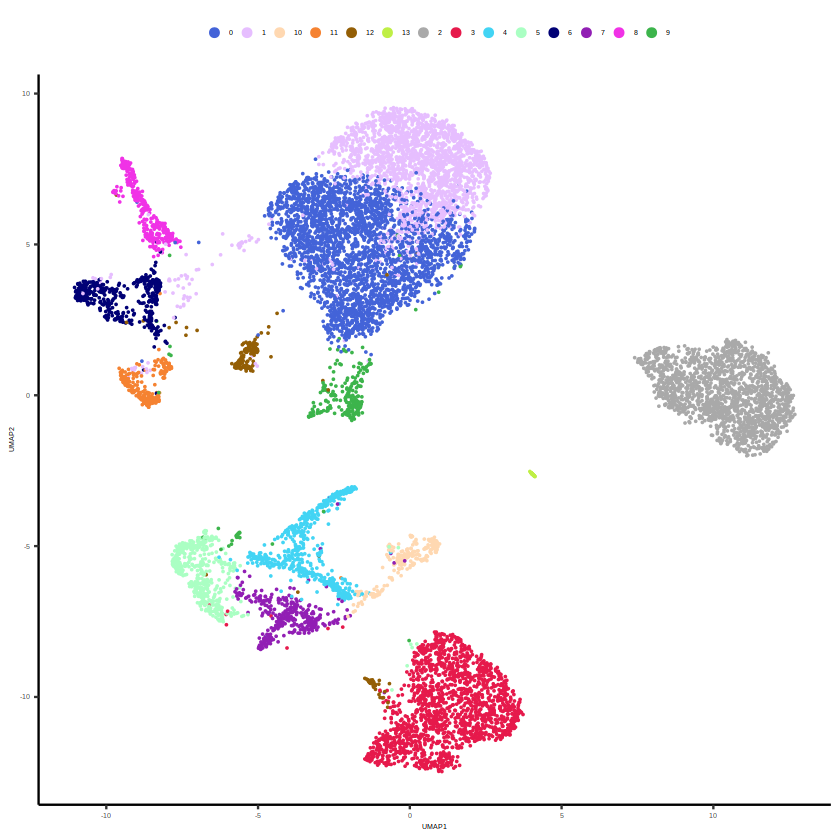

In [494]:
p.cluster = make_umap_subset(umap_embeddings[sample(nrow(umap_embeddings), replace=FALSE), ],
                             point_size = 0.00005,
                             font_size=4,
                             guide_size=2,
                             rasterize = FALSE,
                             color="res.0.5", 
                             values = c("0" = "#4363D8",
                            "1" = "#E6BEFF",
                            "10" = "#FFD8B1",
                            "11" = "#F58231",
                            "12" = "#935e05",
                            "13" = "#BFEF45",
                            "2" = "#A9A9A9",
                            "3" = "#E6194B",
                            "4" = "#42D4F4",
                            "5" = "#AAFFC3",
                            "6" = "#000075",
                            "7" = "#911EB4",
                            "8" = "#F032E6",
                            "9" = "#3CB44B"
                                  )
                ) + theme(legend.spacing.x = unit(0.05, 'mm'))
p.cluster

if (SAVE) {
    ggsave(p.cluster, filename = glue("{SVG_DIR}/figure_1B_cluster_umap.svg"), device = "svg", width = 4.2, height=4, dpi = 300)
    ggsave(p.cluster, filename = glue("{PNG_DIR}/figure_1B_cluster_umap.png"), device = "png", width = 4, height=4, dpi = 300)
}

### Figure 1C

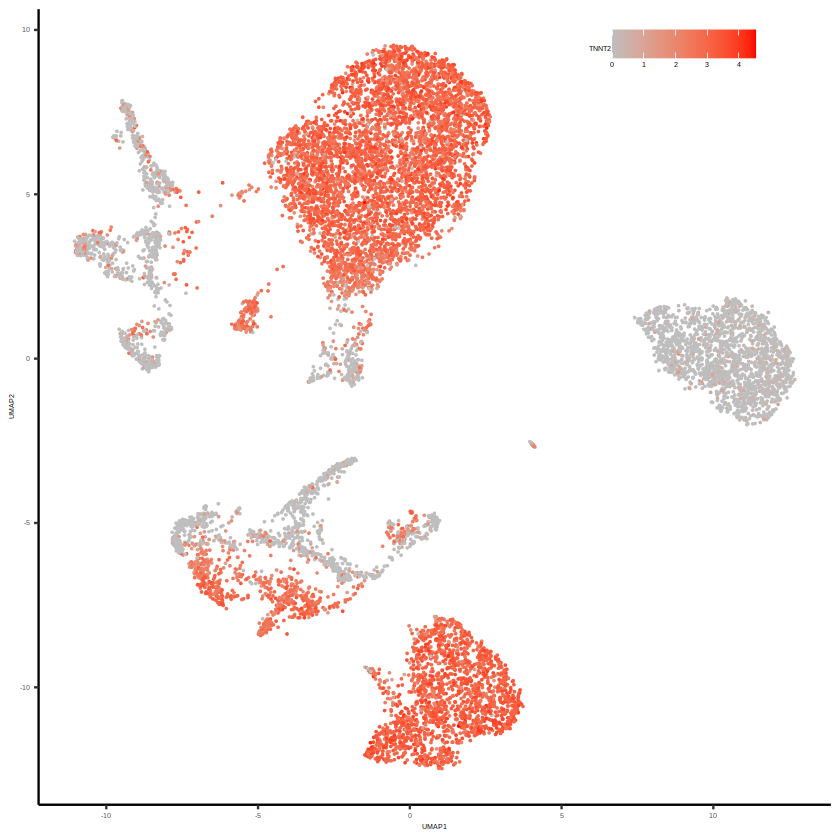

In [429]:
p.tnnt2 = make_umap_gene(umap_embeddings[sample(nrow(umap_embeddings), replace=FALSE), ],
                         gene = "tnnt2", label = "TNNT2", raster = FALSE, point_size = 0.00005,
                         font_size=4,
                         guide_size=2
                        )
p.tnnt2

if (SAVE) {
    ggsave(p.tnnt2, filename = glue("{SVG_DIR}/figure_1C_tnnt2_umap.svg"), device = "svg", width = 4, height=4.2, dpi = 300)
    ggsave(p.tnnt2, filename = glue("{PNG_DIR}/figure_1C_tnnt2_umap.png"), device = "png", width = 4, height=4, dpi = 300)
}

### Figure 1D

In [47]:
cluster_color_df = read.csv("../small_molecule_clusters_cell_types/cluster_colors.csv")
cluster_color_df$cluster = as.character(cluster_color_df$cluster)

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. 

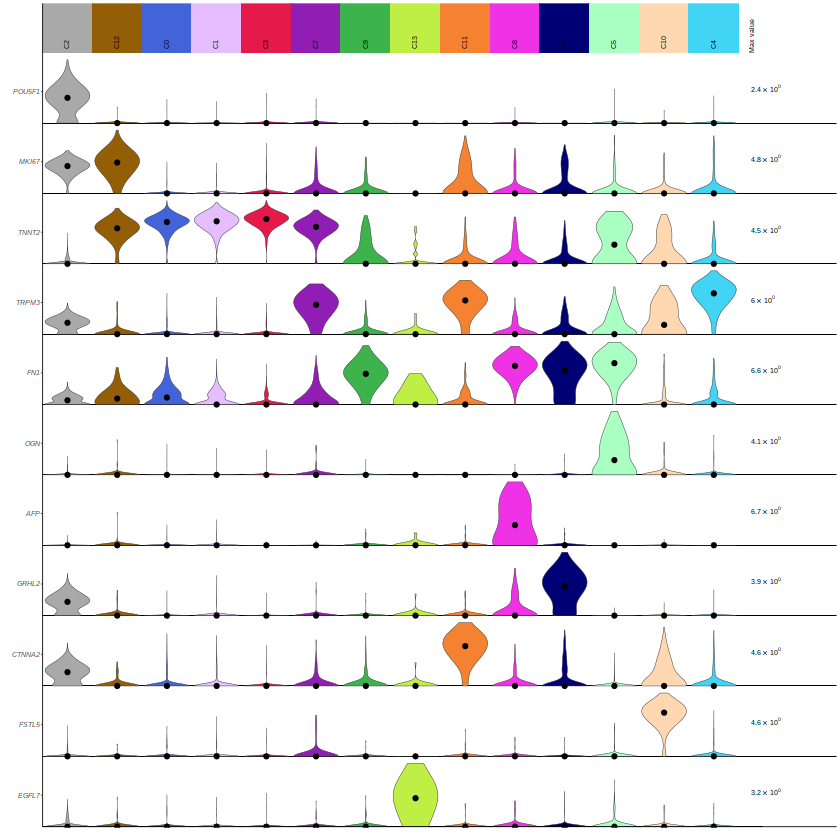

In [436]:
group_order = c("2", "12", "0", "1", "3", "7", "9", "13", "11", "8", "6", "5", "10" , "4")
genes.plot = c("POU5F1", "MKI67", "TNNT2", "TRPM3", "FN1", "OGN", "AFP", "GRHL2", "CTNNA2", "FSTL5", "EGFL7")

p.violin = cluster_group_violin(cardio,
                     group_order=group_order,
                     resolution="res.0.5",
                     genes.plot=genes.plot,
                     cluster_color_df=cluster_color_df,
                     font_size=4
                    )

p.violin

if (SAVE) {
    ggsave(p.violin, filename = glue("{SVG_DIR}/figure_1D_cell_type_violin.svg"), device = "svg", width = 5, height=5, dpi = 300)
    ggsave(p.violin, filename = glue("{PNG_DIR}/figure_1D_cell_type_violin.png"), device = "png", width = 5, height=5, dpi = 300)
}

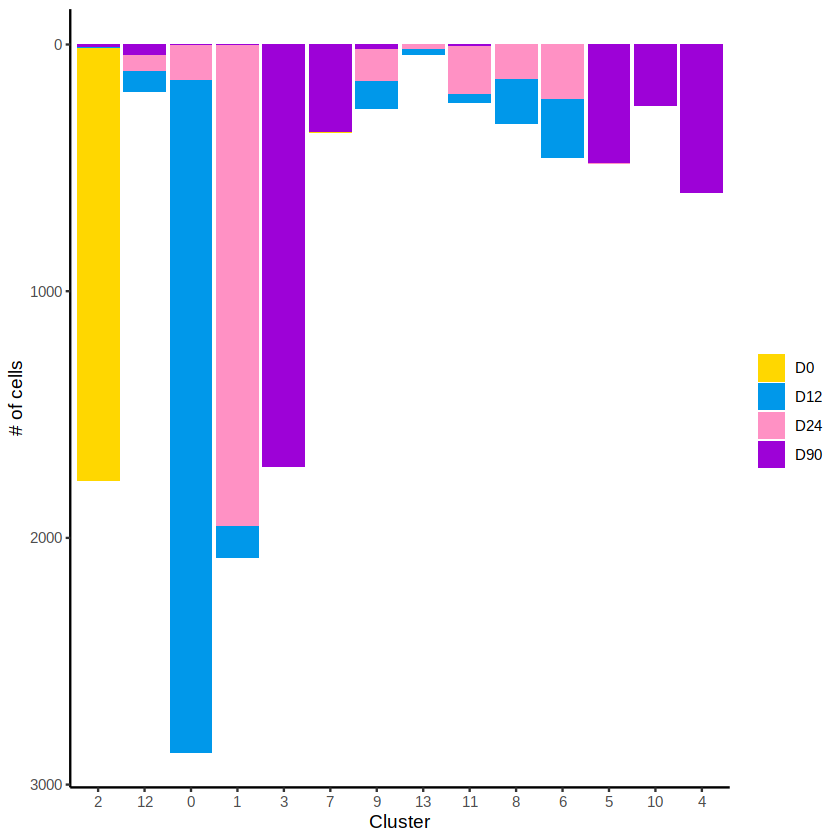

In [431]:
cluster_breakdown <- ggplot(cardio@meta.data,
                            aes(x = factor(res.0.5, levels = c("2", "12", "0", "1", "3", "7", "9", "13", "11", "8", "6", "5", "10" , "4")),
                                fill = dayP)) +
    geom_bar() +
    scale_fill_manual(name = "",
                         breaks = c("D0", "D12", "D24", "D90"), 
                         values = c("D0" = "#FFD700",
                                  "D12" = "#0098EA",
                                  "D24" = "#FF91C4",
                                  "D90" = "#9D02D7"
                                  )
                        )+
    guides(color = guide_legend(nrow = 1, override.aes = list(size=4))) +
    theme(legend.text = element_text(size = 13)) + 
    theme(legend.position = "top", legend.justification = "center") +
    theme(text = element_text(size = 13), axis.text = element_text(size = 13)) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    xlab("Cluster") +
    ylab("# of cells") +
    scale_y_reverse()

plot(cluster_breakdown)

if (SAVE) {
    ggsave(cluster_breakdown, filename = glue("{SVG_DIR}/figure_1D_cluster_by_day.svg"), device = "svg", width = 4, height=1.5, dpi = 300)
    ggsave(cluster_breakdown, filename = glue("{PNG_DIR}/figure_1D_cluster_by_day.png"), device = "png", width = 4, height=1.5, dpi = 300)
}

Checking # of proliferative and non-proliferative cardiomyocytes

In [616]:
table(cardio@meta.data$dayP)


  D0  D12  D24  D90 
1764 3538 2854 3463 

In [621]:
cells_counts = table(cardio@meta.data[, c("res.0.5", "dayP")])

In [622]:
cells_counts

       dayP
res.0.5   D0  D12  D24  D90
     0     0 2726  141    1
     1     0  129 1949    1
     10    2    0    0  246
     11    0   38  197    2
     12    0   84   65   42
     13    0   22   18    0
     2  1758    1    0   10
     3     0    0    0 1710
     4     0    0    0  600
     5     0    0    1  480
     6     0  241  218    0
     7     4    0    1  353
     8     0  182  137    0
     9     0  115  127   18

sum of all cardio clusters

In [627]:
D12_cardio_sum = cells_counts["0", "D12"] + cells_counts["1", "D12"] + cells_counts["12", "D12"] + cells_counts["3", "D12"] + cells_counts["7", "D12"]
D24_cardio_sum = cells_counts["0", "D24"] + cells_counts["1", "D24"] + cells_counts["12", "D24"] + cells_counts["3", "D24"] + cells_counts["7", "D24"]
D90_cardio_sum = cells_counts["0", "D90"] + cells_counts["1", "D90"] + cells_counts["12", "D90"] + cells_counts["3", "D90"] + cells_counts["7", "D90"]

In [626]:
cells_counts["12", "D12"] / D12_cardio_sum

[1] 0.02858115

In [628]:
cells_counts["12", "D24"] / D24_cardio_sum

[1] 0.03014842

In [629]:
cells_counts["12", "D90"] / D90_cardio_sum

[1] 0.01993355

### Plot UMI distribution for each cluster

Picking joint bandwidth of 1070



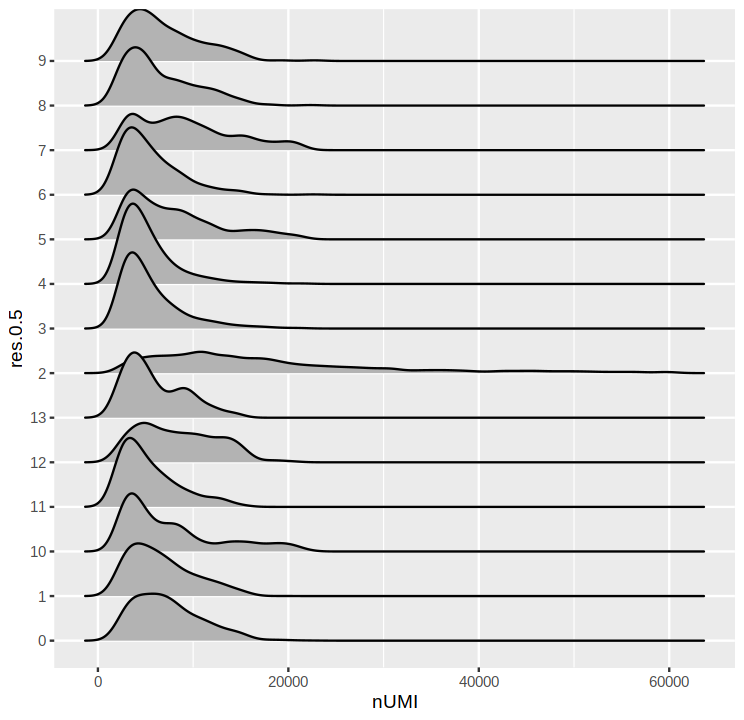

In [641]:
ggplot(cardio@meta.data, aes(x = nUMI, y = res.0.5)) + ggridges::geom_density_ridges()

Picking joint bandwidth of 305



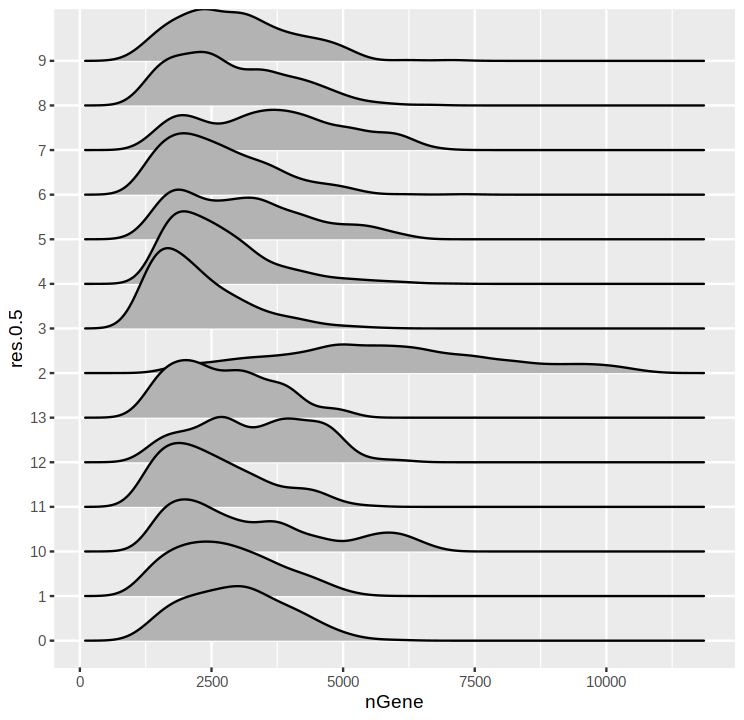

In [648]:
ggplot(cardio@meta.data, aes(x = nGene, y = res.0.5)) + ggridges::geom_density_ridges()

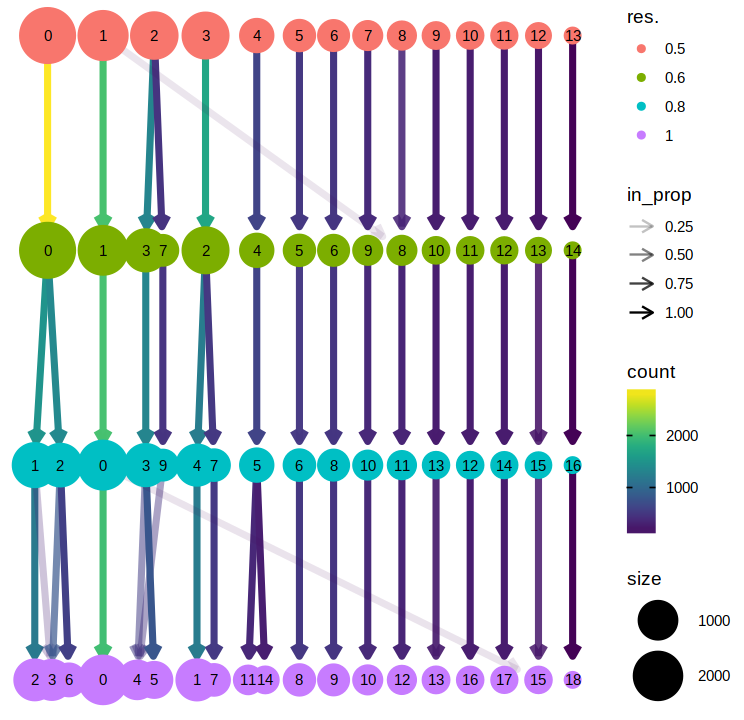

In [659]:
clustree(cardio@meta.data[, c("res.0.5", "res.0.6", "res.0.8", "res.1")], prefix = "res.")

### Figure 2A

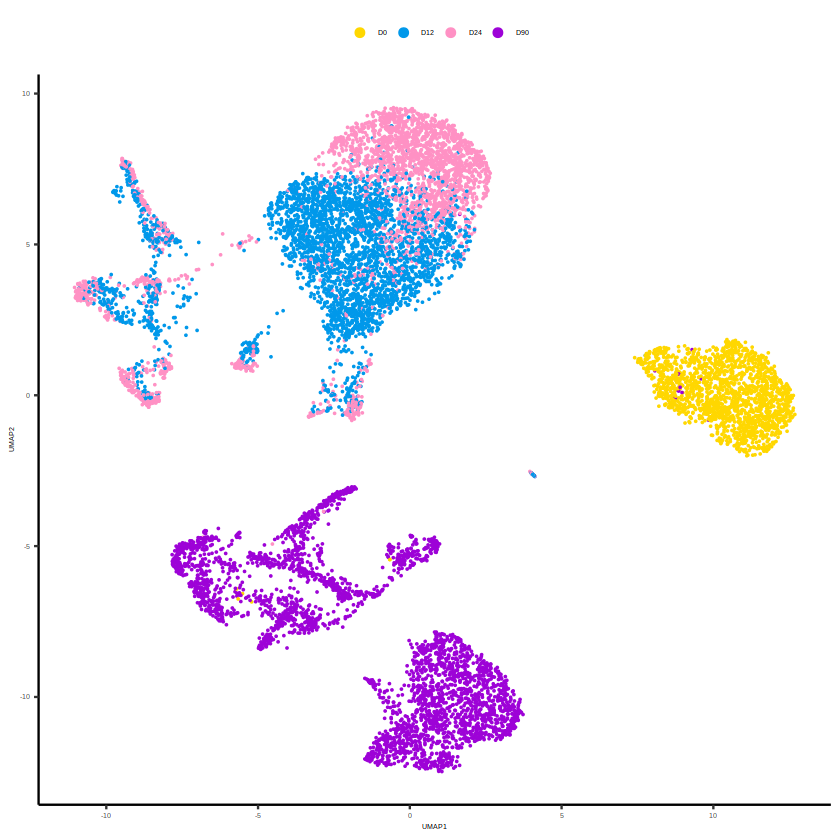

In [495]:
p.day = make_umap_subset(umap_embeddings[sample(nrow(umap_embeddings), replace=FALSE), ],
                         point_size = 0.00005,
                         font_size=4,
                         guide_size=2,
                         rasterize = FALSE,
                         color="dayP",
                         values = c("D0" = "#FFD700",
                            "D12" = "#0098EA",
                            "D24" = "#FF91C4",
                            "D90" = "#9D02D7"
                           )
                )
p.day

if (SAVE) {
    ggsave(p.day, filename = glue("{SVG_DIR}/figure_2A_day_umap.svg"), device = "svg", width = 4, height=4.2, dpi = 300)
    ggsave(p.day, filename = glue("{PNG_DIR}/figure_2A_day_umap.png"), device = "png", width = 4, height=4.2, dpi = 300)
}

### Figure 2B

In [51]:
exp1_metadata <- cardio@meta.data[cardio@meta.data$seq_exp == "Exp1", ]

sampleNumExp1 <- sapply(rownames(exp1_metadata), get_sample_num)

exp1_metadata$sample_num <- sampleNumExp1

exp2_metadata <- cardio@meta.data[cardio@meta.data$seq_exp == "Exp2", ]

metadata.both <- rbind(exp1_metadata, exp2_metadata)

diff_cells_tnnt2 <- cardio@data["TNNT2", rownames(metadata.both)]

sample <- metadata.both[, "sample_num"]

tnnt2_df <- data.frame(tnnt2 = diff_cells_tnnt2, sample = as.character(sample), frac_pos = diff_cells_tnnt2 > 0)

tnnt2_pos <- tapply(tnnt2_df$frac_pos, tnnt2_df$sample, sum)

tnnt2_df <- data.frame(total_pos = tnnt2_pos, total = as.vector(table(tnnt2_df$sample)))

tnnt2_df$seq_fraction = (tnnt2_df$total_pos/tnnt2_df$total) *100

ctnt_unique <- unique(metadata.both[, c("sample_num", "ctnt", "dayP")])

ctnt_unique$seqfraction <- tnnt2_df[ctnt_unique$sample_num, "seq_fraction"]

ctnt_unique$ctnt_0 <- gsub("na", 0, ctnt_unique$ctnt)

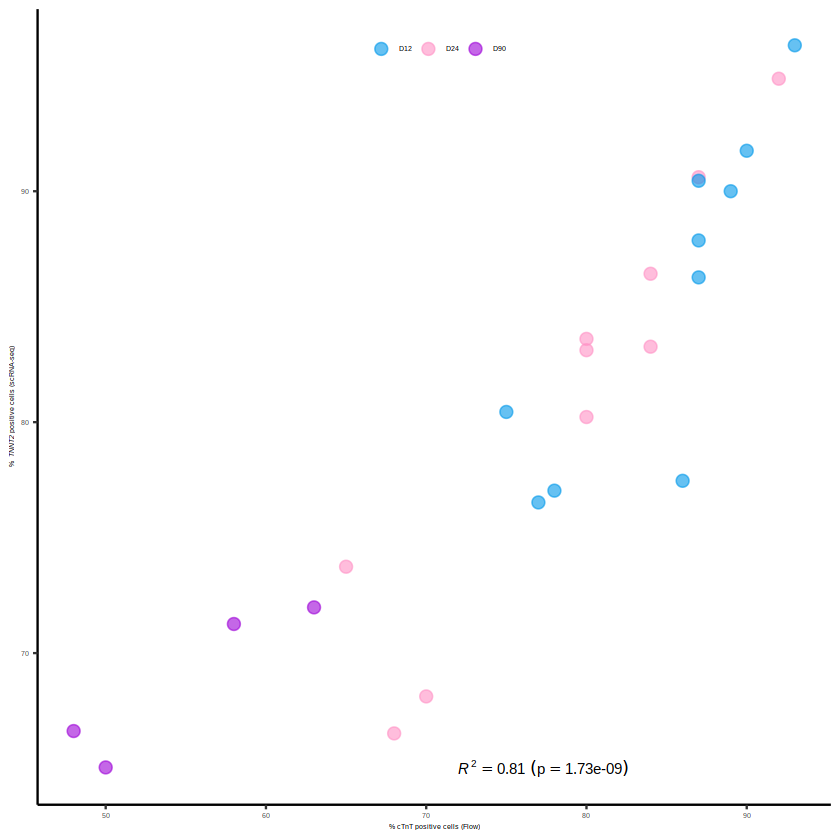

In [444]:
p.ctnt_corr <- ggplot(ctnt_unique[!(ctnt_unique$dayP == "D0"|ctnt_unique$sample_num %in% c("49")), ], aes(x = as.numeric(ctnt_0), y = seqfraction, color = dayP)) +
    geom_point(size = 3, shape = 19, alpha = 0.6) +
    scale_color_manual(name = "",
                         breaks = c("D12", "D24", "D90"), 
                         labels = c("D12", "D24", "D90"),  
                         values = c("D12" = "#0098EA", "D24" = "#FF91C4", "D90" = "#9D02D7")
                        ) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=3))) +
    theme(text = element_text(size = 4), axis.text = element_text(size = 4)) +
    theme(legend.text = element_text(size = 4)) + 
    theme(legend.position = c(0.5, 0.95)) +
    theme(legend.direction="horizontal") +
    #theme(legend.position = "top", legend.justification = "center") +
    xlab("% cTnT positive cells (Flow)") +
    ylab(expression("% " ~italic("TNNT2")~"positive cells (scRNA-seq)")) +
    annotate("text", x = 72, y = 65, label = "italic(R) ^ 2==0.81 ~(p==1.73e-09)", parse = TRUE, hjust = 0, size = 3)
    #annotate("text", x = 50, y = 94, label = "p  == 1.73e-09", parse = TRUE, hjust = 0, size = 6)

p.ctnt_corr

if (SAVE) {
    ggsave(p.ctnt_corr, filename = glue("{SVG_DIR}/figure_2B_ctnt_corr.svg"), device = "svg", width = 5, height=5, dpi = 300)
    ggsave(p.ctnt_corr, filename = glue("{PNG_DIR}/figure_2B_ctnt_corr.png"), device = "png", width = 5, height=5, dpi = 300)
}

### Figure 2C

In [540]:
de_files <- list.dirs(path = "/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/paper_plots/small_molecule_cardio_timepoints_indepth/de_analysis_calcnorm/cluster_de_genes_for_heatmap/", full.names = FALSE, recursive = TRUE)

In [541]:
top_de_genes <- sapply(X = de_files[2:length(de_files)],
                       FUN = function(x) {
                           de_genes_df <- read.csv(paste0("/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/paper_plots/small_molecule_cardio_timepoints_indepth/de_analysis_calcnorm/cluster_de_genes_for_heatmap/", x, "/", x, ".csv"), header = TRUE, row.names = 1, stringsAsFactors = FALSE)
                           up.genes <- de_genes_df[de_genes_df$logFC > 0, ]
                           down.genes <- de_genes_df[de_genes_df$logFC < 0, ]
                           return(c(rownames(up.genes)[1:10], rownames(down.genes)[1:10]))
                       }
      )

In [542]:
markers <- unique(as.vector(top_de_genes))
markers <- markers[!is.na(markers)]
markers

[1] "FAM19A4"       "HAS2"          "RP11-3B12.2"   "BMPER"        
 [5] "LSAMP"         "GRIN2A"        "VCAN"          "COL13A1"      
 [9] "MYH6"          "PPFIA2"        "CNTN5"         "MYH7"         
[13] "H19"           "LINC00881"     "PRSS35"        "INPP4B"       
[17] "HECW2"         "CUX2"          "HS3ST4"        "PLN"          
[21] "RP11-120I21.2" "MEIS2"         "TECRL"         "ALPK2"        
[25] "MYL7"          "MYOM1"         "TTN"           "LDB3"         
[29] "MYL4"          "GRID2"         "L1TD1"         "DPPA4"        
[33] "RP5-964N17.1"  "ADCY2"         "MKI67"         "ESRG"         
[37] "CTD-2306M5.1"  "CASC15"        "SHANK2"        "COL2A1"       
[41] "RP11-175E9.1"  "TENM4"         "HMCN1"         "SC5D"         
[45] "FGF12"         "IGF2"          "C7"            "SULT1E1"      
[49] "MFAP4"         "MYL2"          "RGS6"          "PRRX1"        
[53] "LIN28A"        "DNMT3B"        "LAMA1"         "RALYL"        
[57] "MOXD1"         "A2M"           "CPNE5"         "PODXL"        
[61] "SNTG2"         "ANKRD1"        "SLC8A1"        "TNNT2"

In [543]:
keep.cells <- rownames(cardio@meta.data[cardio@meta.data$res.0.5 %in% c("2", "0", "1", "3"), ])

In [544]:
top.marker.mat <- cardio@scale.data[unique(markers), keep.cells]
top.marker.mat = t(scale(t(top.marker.mat), center = TRUE, scale=TRUE))

top.marker.metdata <- cardio@meta.data[keep.cells, c("dayP", "res.0.5")]

top.marker.metdata$Day <- top.marker.metdata$dayP

top.marker.metdata$cell <- rownames(top.marker.metdata)

top.marker.metdata$Cluster <- factor(top.marker.metdata$res.0.5, levels = c("2", "0", "1", "3"
                                                                           )
                                    )

top.marker.metdata <- top.marker.metdata %>% arrange(Cluster)

cells <- top.marker.metdata$cell
top.marker.metdata <- top.marker.metdata[, c("Day", "Cluster")]
rownames(top.marker.metdata) <- cells

top_marker.mat.ordered <- top.marker.mat[, cells]

In [545]:
max(top_marker.mat.ordered)

[1] 6.700213

In [546]:
min(top_marker.mat.ordered)

[1] -2.482508

In [547]:
top_marker.mat.ordered[top_marker.mat.ordered > 4] <- 4

In [548]:
table(top.marker.metdata$Cluster)


   2    0    1    3 
1769 2868 2079 1710 

In [549]:
palette_length <- 1000
my_palette <- colorRampPalette(c("blue", "white", "red"))(n = palette_length)

my_breaks <- c(seq(min(top_marker.mat.ordered), 0, length.out=ceiling(palette_length/2) + 1), 
              seq(max(top_marker.mat.ordered)/palette_length, max(top_marker.mat.ordered), length.out=floor(palette_length/2)))


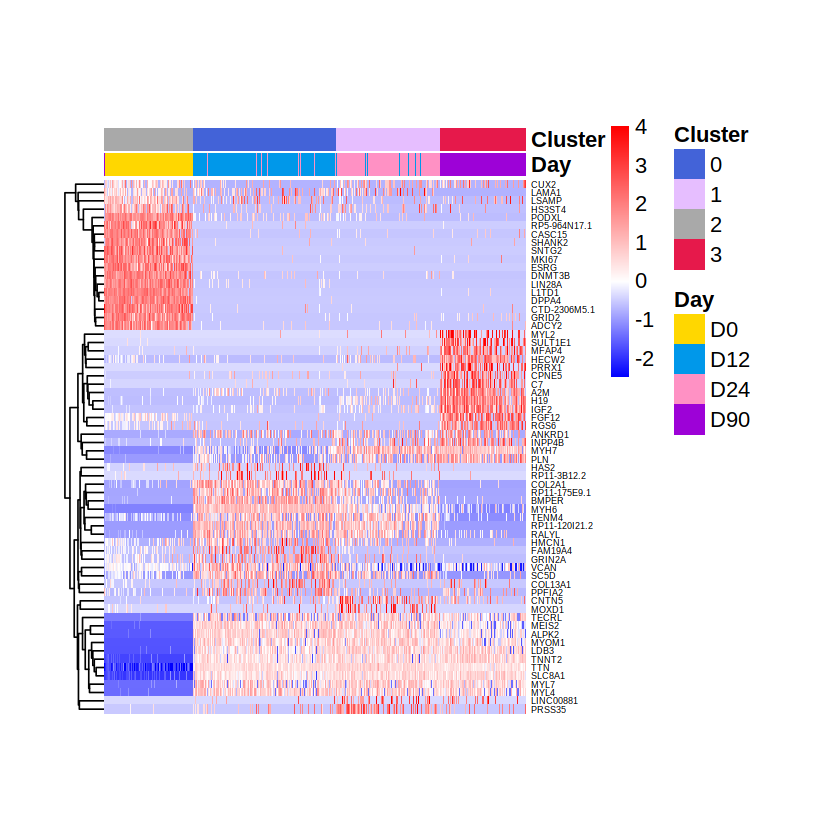

In [550]:
ann_colors <- list(
    Day = c("D0" = "#FFD700", "D12" = "#0098EA", "D24" = "#FF91C4", "D90" = "#9D02D7"),
    Cluster = c("0" = "#4363D8", "1" = "#E6BEFF", "2" = "#A9A9A9", "3" = "#E6194B")
)
pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata,
         labels_col = top.marker.metdata$Cluster,
         cellheight = 5,
         cellwidth = 0.03,
         fontsize_row = 5,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = TRUE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 13,
         treeheight_row = 20,
        )

if (SAVE) {
    pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata,
         labels_col = top.marker.metdata$Cluster,
         cellheight = 7,
         cellwidth = 0.05,
         fontsize_row = 5,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = TRUE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 13,
         treeheight_row = 20,
         filename = glue("{PDF_DIR}/figure_2C_cardio_heatmap.pdf"),
         width = 9, height=7, dpi = 300
        )
    pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata,
         labels_col = top.marker.metdata$Cluster,
         cellheight = 7,
         cellwidth = 0.05,
         fontsize_row = 5,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = TRUE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 13,
         treeheight_row = 20,
         filename = glue("{PNG_DIR}/figure_2C_cardio_heatmap.png"),
         width = 9, height=7, dpi = 300
        )
}

### Figure 2D

In [447]:
clusters = c("2", "0", "1", "3")
genes = c("MYH6", "MYH7", "MYL7", "MYL2", "MYL3", "MYL9")

p.structural = cluster_group_violin(cardio, group_order=clusters, genes.plot = genes, cluster_color_df = cluster_color_df, font_size=4)

if (SAVE) {
    ggsave(p.structural, filename = glue("{SVG_DIR}/figure_2D_structural_violin.svg"), device = "svg", width = 4, height=4, dpi = 300)
    ggsave(p.structural, filename = glue("{PNG_DIR}/figure_2D_structural_violin.png"), device = "png", width = 4, height=4, dpi = 300)
}

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. 

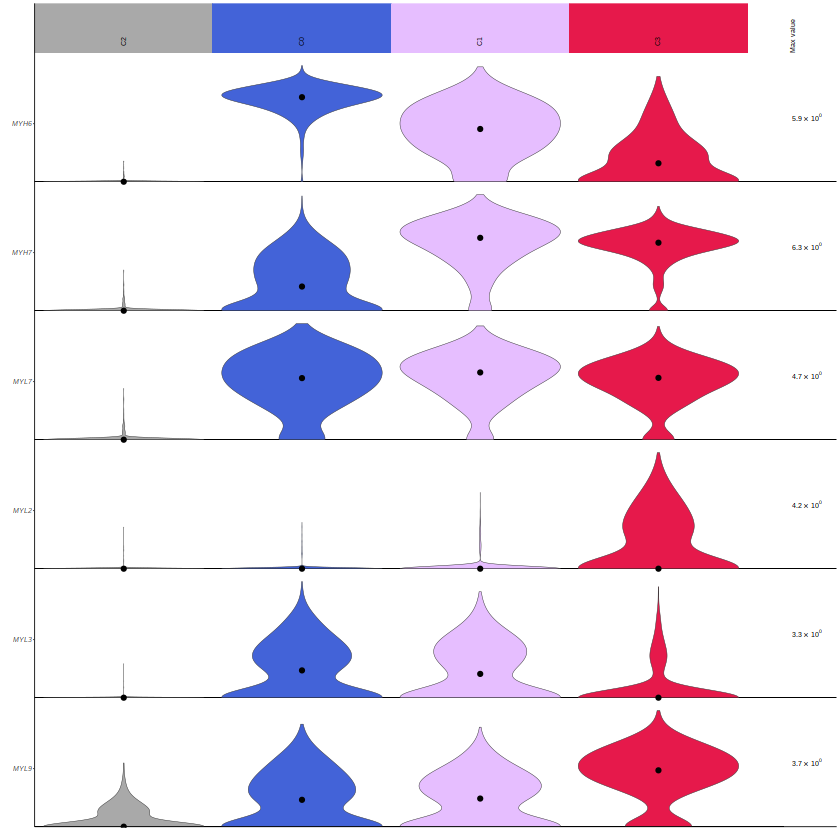

In [446]:
p.structural

### Figure 2E

In [448]:
genes = c("COL2A1", "COL4A1", "COL4A2", "COL3A1", "COL5A2", "COL19A1")
p.ecm = cluster_group_violin(cardio, group_order=clusters, genes.plot = genes, cluster_color_df = cluster_color_df, font_size = 4)

if (SAVE) {
    ggsave(p.ecm, filename = glue("{SVG_DIR}/figure_2D_ecm_violin.svg"), device = "svg", width = 4, height=4, dpi = 300)
    ggsave(p.ecm, filename = glue("{PNG_DIR}/figure_2D_ecm_violin.png"), device = "png", width = 4, height=4, dpi = 300)
}

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. 

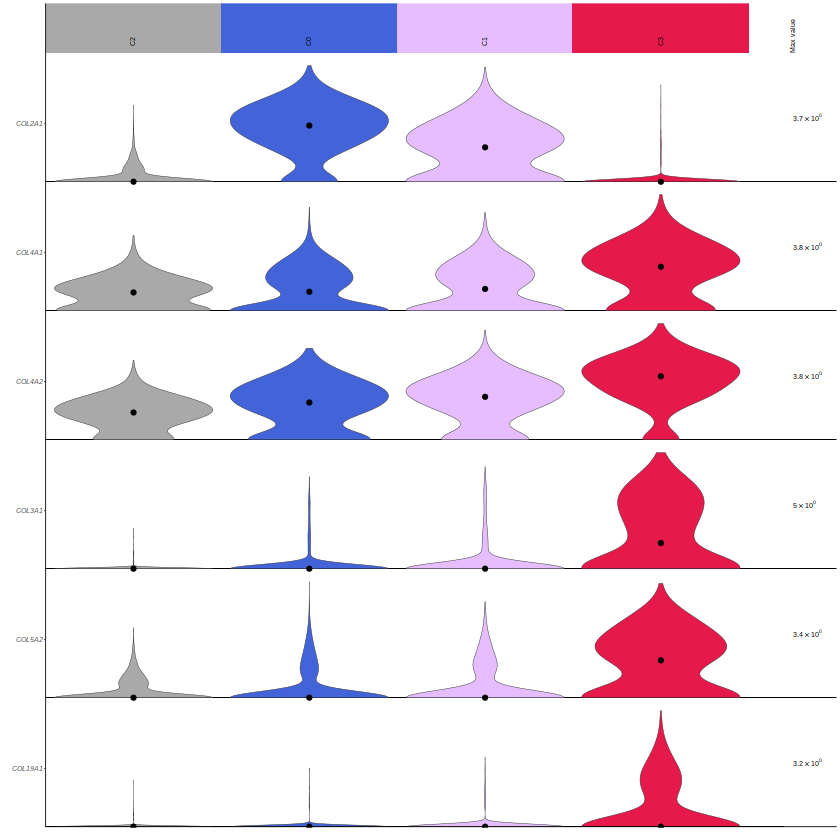

In [449]:
plot(p.ecm)

### Figure 2F

In [450]:
clusters = c("2", "0", "1", "3")
genes = c("SLC2A3", "SLC27A6", "FABP3", "CACNA1D", "CACNA1C", "TGFB2", "SMAD6")

p.signaling_metabolic = cluster_group_violin(cardio, group_order=clusters, genes.plot = genes, cluster_color_df=cluster_color_df, font_size = 4)

if (SAVE) {
    ggsave(p.signaling_metabolic, filename = glue("{SVG_DIR}/figure_2D_sig_metabolic_violin.svg"), device = "svg", width = 4, height=4, dpi = 300)
    ggsave(p.signaling_metabolic, filename = glue("{PNG_DIR}/figure_2D_sig_metabolic_violin.png"), device = "png", width = 4, height=4, dpi = 300)
}

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. 

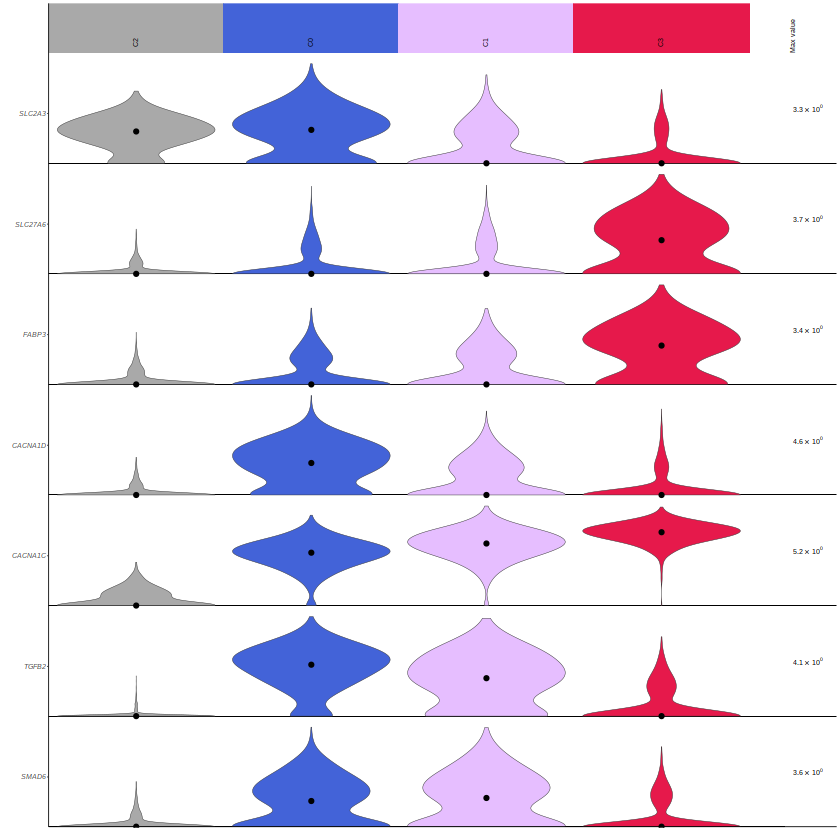

In [451]:
plot(p.signaling_metabolic)

### Figure 3C

In [452]:
clusters = c("2", "0", "1", "3")
genes = c("MYH6", "MYH7", "VCAN", "H19", "COL2A1", "MYL7", "MYL2", "MEIS2", "ESRRG", "FABP3", "TNNT2")

p.feature_selection = cluster_group_violin(cardio, group_order=clusters, genes.plot = genes, cluster_color_df=cluster_color_df, font_size = 4)

if (SAVE) {
    ggsave(p.feature_selection, filename = glue("{SVG_DIR}/figure_3C_feature_selection_violin.svg"), device = "svg", width = 4, height=7, dpi = 300)
    ggsave(p.feature_selection, filename = glue("{PNG_DIR}/figure_3C_sfeature_selection_violin.png"), device = "png", width = 4, height=7, dpi = 300)
}

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. 

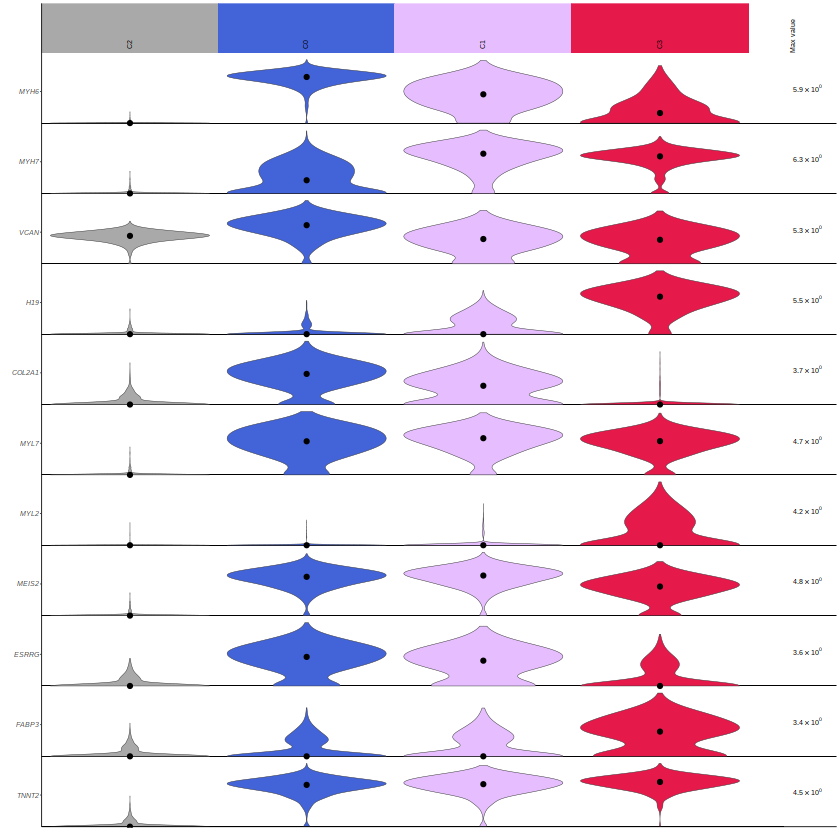

In [453]:
plot(p.feature_selection)

### Figure 3D FISH transcript abundance

In [357]:
features_df = read.csv("../nonstructure_fish_and_scrnaseq/quilt_nonstructure_features/features/48c32299_cp_features.csv", stringsAsFactors=FALSE, header = TRUE)

In [358]:
all_experiments = paste(features_df$plate_name, features_df$well_position, sep = '_')

In [359]:
unique(all_experiments)

[1] "5.5e+09_B4"    "5500000001_B4" "5500000005_B2" "5500000005_B4"
 [5] "5500000006_B2" "5500000006_B4" "5500000035_B2" "5500000035_B3"
 [9] "5500000035_B5" "5500000035_C4" "5500000039_B2" "5500000039_B3"
[13] "5500000039_B5" "5500000039_C4" "5500000084_B2" "5500000084_B3"
[17] "5500000093_B2" "5500000093_B3"

In [360]:
features_df$exp_alias = all_experiments

If count is 0 for a probe, mean seg area shape area will be NA, and the resulting density will also be NA:
- before calculating density, set all NA mean seg area shape areas to 0 (otherwise all of those NA densities aren't used in plots or statistics which exclude NA)
- ok for density to be NA b/c napari area shape area is NA (means that cell just wasn't annotated)

In [361]:
features_df$napariCell_Mean_seg_probe_488_AreaShape_Area[is.na(features_df$napariCell_Mean_seg_probe_488_AreaShape_Area)] = 0
features_df$napariCell_Mean_seg_probe_561_AreaShape_Area[is.na(features_df$napariCell_Mean_seg_probe_561_AreaShape_Area)] = 0
features_df$napariCell_Mean_seg_probe_638_AreaShape_Area[is.na(features_df$napariCell_Mean_seg_probe_638_AreaShape_Area)] = 0

Convert area from pixels to um squared; for zeiss microscope the pixel size xy is 0.2708333

In [362]:
features_df$napariCell_AreaShape_Area_pixel = 0.2708333^2 * features_df$napariCell_AreaShape_Area

In [363]:
features_df$napariCell_density_488 = features_df$napariCell_Children_seg_probe_488_Count / features_df$napariCell_AreaShape_Area_pixel
features_df$napariCell_density_561 = features_df$napariCell_Children_seg_probe_561_Count / features_df$napariCell_AreaShape_Area_pixel
features_df$napariCell_density_638 = features_df$napariCell_Children_seg_probe_638_Count / features_df$napariCell_AreaShape_Area_pixel

In [364]:
probes.show = c(488, 561, 638)
to_combine_df = melt(features_df, measure.vars = paste0("napariCell", "_density_", probes.show), variable_name = "probe")

colnames(to_combine_df)[colnames(to_combine_df) == "probe546"] = "probe561"
colnames(to_combine_df)[colnames(to_combine_df) == "probe647"] = "probe638"

In [366]:
to_combine_df$gene = sapply(1:length(to_combine_df$exp_alias),
       FUN = function(x) {
           current_row = to_combine_df[x, ]
           current_probe = as.character(current_row[, "probe"])
           current_probe = unlist(strsplit(current_probe, split="_"))
           fluor = current_probe[3]
           
           gene = paste0("probe", fluor)
           gene = current_row[, gene]
           gene_symbol = unlist(strsplit(gene, split="-"))
           gene_symbol = gene_symbol[1]
           return(gene_symbol)
    
})

In [367]:
to_combine_df$cell_age_final = sapply(to_combine_df$cell_age,
       FUN = function(x) {
           if (x == "29") {
               return("30")
           }
           else {
               return(x)
           }
       }
       )

In [368]:
gene_age_unique = unique(to_combine_df[, c("gene", "cell_age_final")])

In [370]:
#custom scientific notation function from stackoverflow
fancy_scientific = function(x) {
    x = format(x, scientific = TRUE)
    x = gsub("^(.*)e", "'\\1'e", x)
    x = gsub("e", "%*%10^", x)
    parse(text=x)
    }

In [371]:
#custom scientific notation function from stackoverflow
custom_scientific_not = function(x) {
    x = format(x, scientific = TRUE)
    split_x = unlist(strsplit(x, split="\\+|-"))
    sign = unlist(strsplit(x, split="e"))
    #sign = sign[2]
    x = sign[1]
    #sign = substr(sign, 1, 1)
    x
}

In [372]:
#custom scientific notation function from stackoverflow
custom_scientific_not = function(x) {
    x = format(x, scientific = TRUE)
    split_x = unlist(strsplit(x, split="\\+|-"))
    sign = unlist(strsplit(x, split="e"))
    x = sign[1]
    sign = sign[2]
    sign = substr(sign, 1, 1)
    #sign
    exponent = split_x[2]
    exponent = gsub("0*", "", exponent)
    if (exponent == "") {
        exponent = "0"
    }
    x = paste0("\'", x, "\'%*%10^", sign, exponent)
    parse(text=x)
}

In [374]:
to_combine_df$gene_f = factor(to_combine_df$gene, levels=c("MYH6", "MYH7", "VCAN", "H19", "COL2A1", "MYL7", "MYL2", "MEIS2", "ESRRG", "FABP3", "TNNT2"))

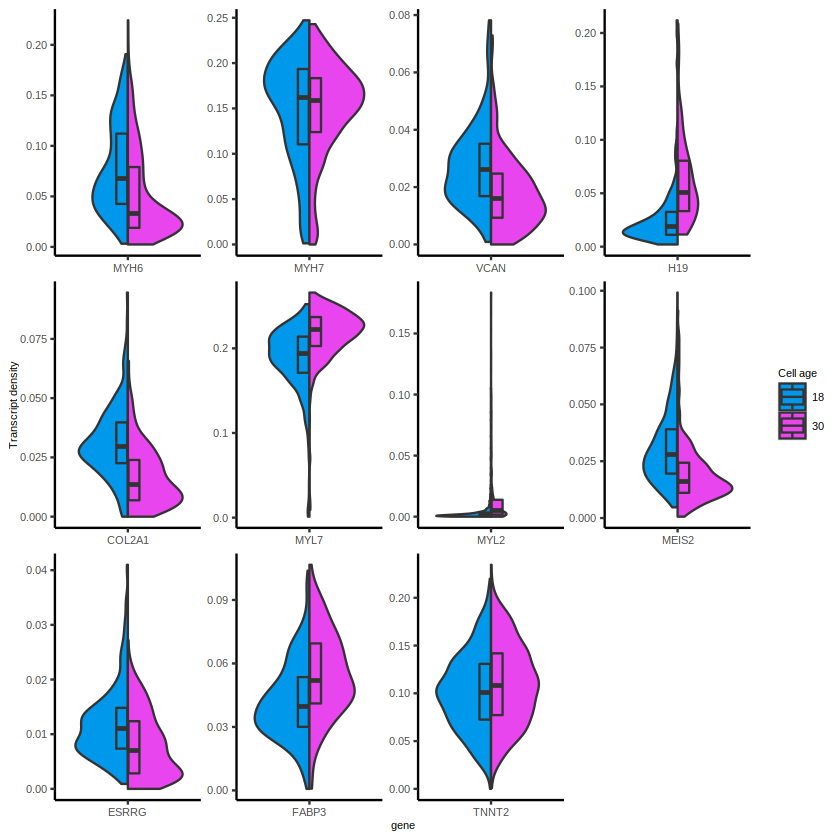

In [458]:
p.fish_violin = ggplot(to_combine_df, aes(x = gene, y = value, fill = cell_age_final)) +
    geom_split_violin() +
    geom_boxplot(width = 0.2, notch = FALSE, outlier.shape = NA, coef=0) +
    facet_wrap(~gene_f, scales="free") +
    scale_fill_manual(name="Cell age", values = c("#0098EA", "#E945EF")) +
    theme(text = element_text(size = 6), axis.text = element_text(size = 6)) +
    theme(legend.text = element_text(size = 6)) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line = element_line(color = "black")) +
    theme(strip.background = element_blank(), strip.text.x = element_blank()) +
    ylab("Transcript density")

p.fish_violin

if (SAVE) {
    ggsave(p.fish_violin, filename = glue("{SVG_DIR}/figure_3D_fish_density_violin.svg"), device = "svg", width = 6, height=6, dpi = 300)
    ggsave(p.fish_violin, filename = glue("{PNG_DIR}/figure_3D_fish_density_violin.png"), device = "png", width = 6, height=6, dpi = 300)
}

In [539]:
unique(features_df[, c("exp_alias", "probe488", "probe546", "probe647", "cell_age", "cell_line")])

exp_alias     probe488  probe546 probe647 cell_age cell_line
1    5.5e+09_B4    TNNT2-B2  MYL7-B5  MYL2-B4  18       AICS-0   
98   5500000001_B4 TNNT2-B2  MYL7-B5  MYL2-B4  29       AICS-0   
168  5500000005_B2 TNNT2-B2  MYH6-B1  MYH7-B4  18       AICS-0   
237  5500000005_B4 TNNT2-B2  MYL7-B5  MYL2-B4  18       AICS-0   
307  5500000006_B2 TNNT2-B2  MYH6-B1  MYH7-B4  29       AICS-0   
398  5500000006_B4 TNNT2-B2  MYL7-B5  MYL2-B4  29       AICS-0   
523  5500000035_B2 MYH6-B1   MYH7-B4  ESRRG-B5 18       AICS-0   
671  5500000035_B3 MYL2-B4   MYL7-B5  MEIS2-B2 18       AICS-0   
840  5500000035_B5 MYL2-B4   H19-B3   FABP3-B1 18       AICS-0   
988  5500000035_C4 COL2A1-B4 VCAN-B3  TNNT2-B2 18       AICS-0   
1157 5500000039_B2 MYH6-B1   MYH7-B4  ESRRG-B5 30       AICS-0   
1276 5500000039_B3 MYL2-B4   MYL7-B5  MEIS2-B2 30       AICS-0   
1383 5500000039_B5 MYL2-B4   H19-B3   FABP3-B1 30       AICS-0   
1500 5500000039_C4 COL2A1-B4 VCAN-B3  TNNT2-B2 30       AICS-0   
1657 5500000084_B2 MYH6-B1   MYH7-B4  ESRRG-B5 18       AICS-0   
1858 5500000084_B3 MYL2-B4   MYL7-B5  MEIS2-B2 18       AICS-0   
2061 5500000093_B2 MYH6-B1   MYH7-B4  ESRRG-B5 29       AICS-0   
2233 5500000093_B3 MYL2-B4   MYL7-B5  MEIS2-B2 29       AICS-0

### Supplementary Figure 1C

In [459]:
source("/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/cardio_scrnaseq_code/scripts/plotting/plot_utils.R")

In [462]:
mini_umap_df = unique(umap_embeddings[, c("sample_num", "day")])
mini_umap_df$sample_num = as.integer(mini_umap_df$sample_num)

In [463]:
mini_umap_df = mini_umap_df %>% arrange(day, sample_num)
mini_umap_df$sample_num = as.character(mini_umap_df$sample_num)

In [464]:
mini_umap_df

sample_num day
1  54         D0 
2  55         D0 
3  11         D12
4  13         D12
5  15         D12
6  17         D12
7  19         D12
8  21         D12
9  23         D12
10 25         D12
11 27         D12
12 29         D24
13 31         D24
14 33         D24
15 35         D24
16 37         D24
17 39         D24
18 44         D24
19 45         D24
20 47         D24
21 52         D93
22 53         D93
23 49         D96
24 50         D96
25 51         D96

In [472]:
all_sample_plots = vector("list", 25)
i = 1
for (n in mini_umap_df$sample_num) {
    p_sample = plot_single_sample(umap_embeddings, sample=n, point_size=0.000005) + theme_void()
    all_sample_plots[[i]] = p_sample
    i = i+1
}

In [479]:
options(repr.plot.width = 17, repr.plot.height = 6, repr.plot.res = 120)

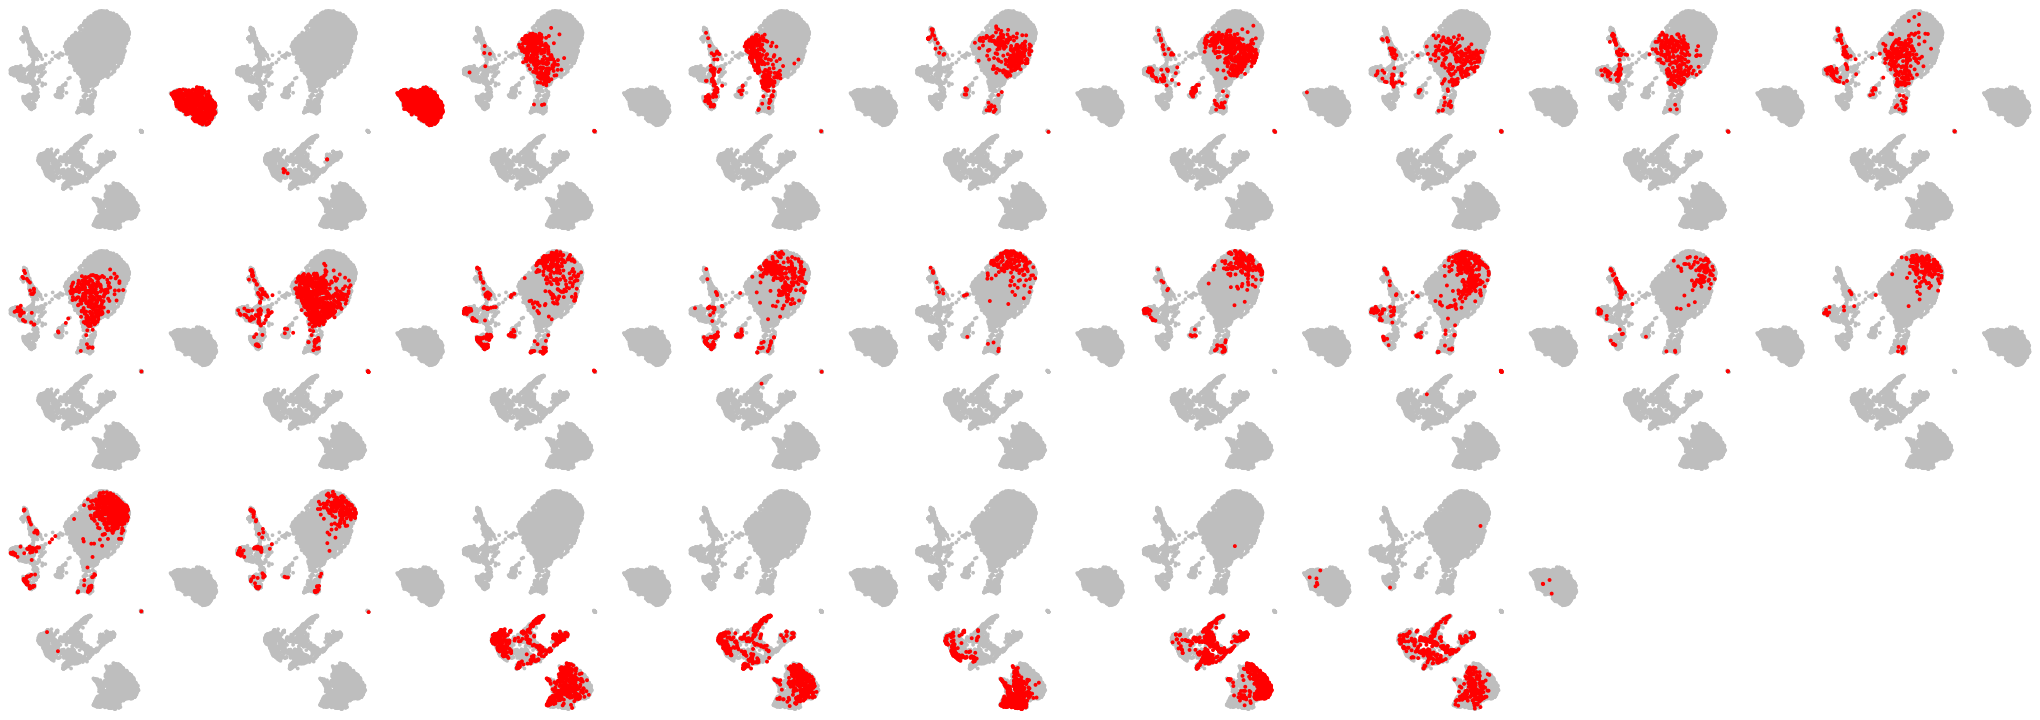

In [480]:
sample_combo = do.call("grid.arrange", c(all_sample_plots, ncol=9, nrow=3))
if (SAVE) {
    ggsave(sample_combo, filename = glue("{SVG_DIR}/supp_figure_1D_protocol1_samples.svg"), device = "svg", width = 17, height=6, dpi = 300)
    ggsave(sample_combo, filename = glue("{PNG_DIR}/supp_figure_1D_protocol1_samples.png"), device = "png", width = 17, height=6, dpi = 300)
}

### Supplemental Figure 2A

In [274]:
de_files <- list.dirs(path = "/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/paper_plots/small_molecule_cardio_timepoints_indepth/de_analysis/cluster_de_genes_noncardio_for_heatmap2/", full.names = FALSE, recursive = TRUE)

In [275]:
top_de_genes <- sapply(X = de_files[2:length(de_files)],
                       FUN = function(x) {
                           de_genes_df <- read.csv(paste0("/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/paper_plots/small_molecule_cardio_timepoints_indepth/de_analysis/cluster_de_genes_noncardio_for_heatmap2/", x, "/", x, ".csv"), header = TRUE, row.names = 1, stringsAsFactors = FALSE)
                           up.genes <- de_genes_df[de_genes_df$logFC > 0, ]
                           down.genes <- de_genes_df[de_genes_df$logFC < 0, ]
                           return(c(rownames(up.genes)[1:2], rownames(down.genes)[1:2]))
                       }
      )

In [276]:
markers <- unique(as.vector(top_de_genes))
markers <- markers[!is.na(markers)]
markers

[1] "EYS"          "FSTL5"        "PDZRN4"       "CNTN5"        "MYH6"        
 [6] "CENPF"        "ESM1"         "RP5-964N17.1" "ADAMTSL3"     "TYRP1"       
[11] "FN1"          "THBS2"        "GABRP"        "GRHL2"        "GPC5"        
[16] "AFP"          "SERPINA1"     "LINC00842"    "GPR126"       "CTNNA2"      
[21] "FLT1"         "CNTN1"        "RMST"         "COL3A1"       "COL1A2"      
[26] "PCDH9"        "GRIA4"        "A2M"          "IGF2"         "TRPM3"       
[31] "RELN"         "COL1A1"       "H19"          "KDR"          "ELTD1"       
[36] "POSTN"        "SERPINF1"     "DCT"          "TTN"          "ACTC1"       
[41] "GATA4"        "ELN"          "PRTG"         "CPAMD8"       "OGN"         
[46] "LRP2"         "RP11-175E9.1" "C7"           "KCNMA1"       "KCNIP4"      
[51] "ZFPM2"        "MFAP4"        "SBSPON"       "SULF1"        "BNC2"

In [277]:
length(markers)

[1] 55

In [278]:
# add TNNT2, MKI67, and EGFL7
markers <- c(markers, "TNNT2", "MKI67", "EGFL7")

In [279]:
keep.cells <- rownames(cardio@meta.data[cardio@meta.data$res.0.5 %in% c("7", "9", "13", "11", "8", "6", "5", "10", "4"), ])

In [280]:
top.marker.mat <- cardio@scale.data[unique(markers), keep.cells]
top.marker.mat = t(scale(t(top.marker.mat), center = TRUE, scale=TRUE))
top.marker.metdata <- cardio@meta.data[keep.cells, c("dayP", "res.0.5")]
top.marker.metdata$Day <- top.marker.metdata$dayP

top.marker.metdata$cell <- rownames(top.marker.metdata)
top.marker.metdata$Cluster <- factor(top.marker.metdata$res.0.5, levels = c("7", "9", "13", "11", "8", "6", "5", "10", "4"))
top.marker.metdata <- top.marker.metdata %>% arrange(Cluster)

cells <- top.marker.metdata$cell
top.marker.metdata <- top.marker.metdata[, c("Day", "Cluster")]
rownames(top.marker.metdata) <- cells

top_marker.mat.ordered <- top.marker.mat[, cells]

In [281]:
min(top_marker.mat.ordered)

[1] -1.092007

In [282]:
max(top_marker.mat.ordered)

[1] 10.23037

In [283]:
top_marker.mat.ordered[top_marker.mat.ordered > 4] <- 4

In [284]:
table(top.marker.metdata$Cluster)


  7   9  13  11   8   6   5  10   4 
358 260  40 237 319 459 481 248 600 

In [285]:
table(top.marker.metdata$Day)


  D0  D12  D24  D90 
   6  598  699 1699 

In [286]:
palette_length <- 1000
my_palette <- colorRampPalette(c("blue", "white", "red"))(n = palette_length)

my_breaks <- c(seq(min(top_marker.mat.ordered), 0, length.out=ceiling(palette_length/2) + 1), 
              seq(max(top_marker.mat.ordered)/palette_length, max(top_marker.mat.ordered), length.out=floor(palette_length/2)))


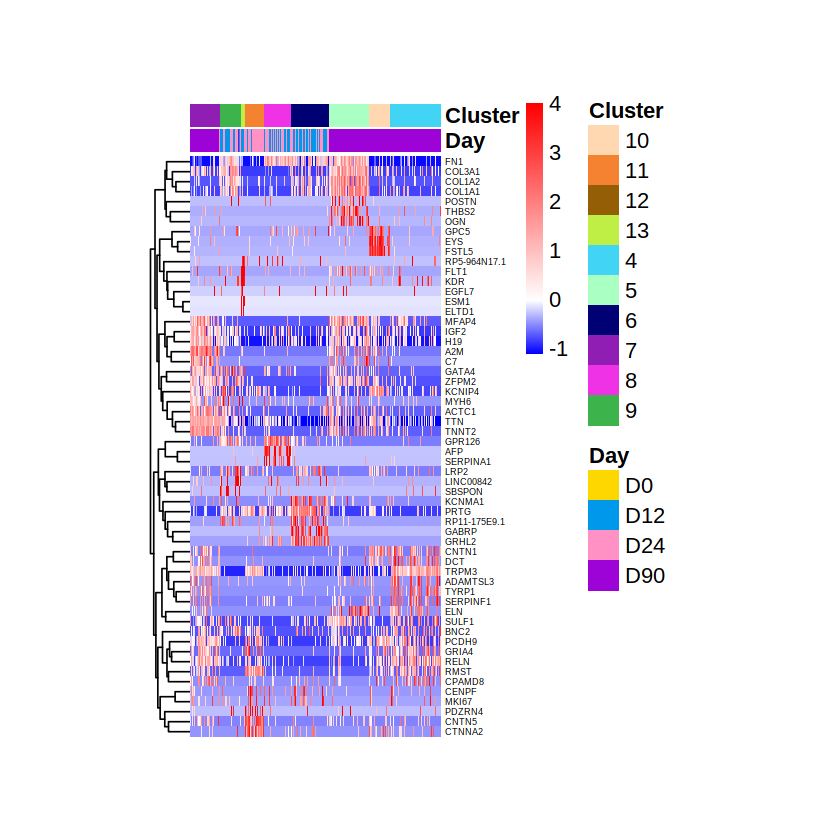

In [287]:
ann_colors <- list(
    Day = c("D0" = "#FFD700", "D12" = "#0098EA", "D24" = "#FF91C4", "D90" = "#9D02D7"),
    Cluster = c("10" = "#FFD8B1",
                "11" = "#F58231",
                "12" = "#935e05",
                "13" = "#BFEF45",
                "4" = "#42D4F4",
                "5" = "#AAFFC3",
                "6" = "#000075",
                "7" = "#911EB4",
                "8" = "#F032E6",
                "9" = "#3CB44B"
               )
)
pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata,
         labels_col = top.marker.metdata$Cluster,
         cellheight = 6,
         cellwidth = 0.05,
         fontsize_row = 5,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = TRUE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 13,
         treeheight_row = 20,
        
        )

if (SAVE) {
    pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata,
         labels_col = top.marker.metdata$Cluster,
         cellheight = 6,
         cellwidth = 0.05,
         fontsize_row = 5,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = TRUE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 13,
         treeheight_row = 20,
         width = 5,
         height = 7,
         filename = glue("{PDF_DIR}/supp_figure_2A_protocol1_noncardio_heatmap.pdf"),
        )
    
        pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata,
         labels_col = top.marker.metdata$Cluster,
         cellheight = 6,
         cellwidth = 0.05,
         fontsize_row = 5,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = TRUE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 13,
         treeheight_row = 20,
         width = 5,
         height = 7,
         filename = glue("{PNG_DIR}/supp_figure_2A_protocol1_noncardio_heatmap.png")
        )
}

### Supplemental Figure 2B

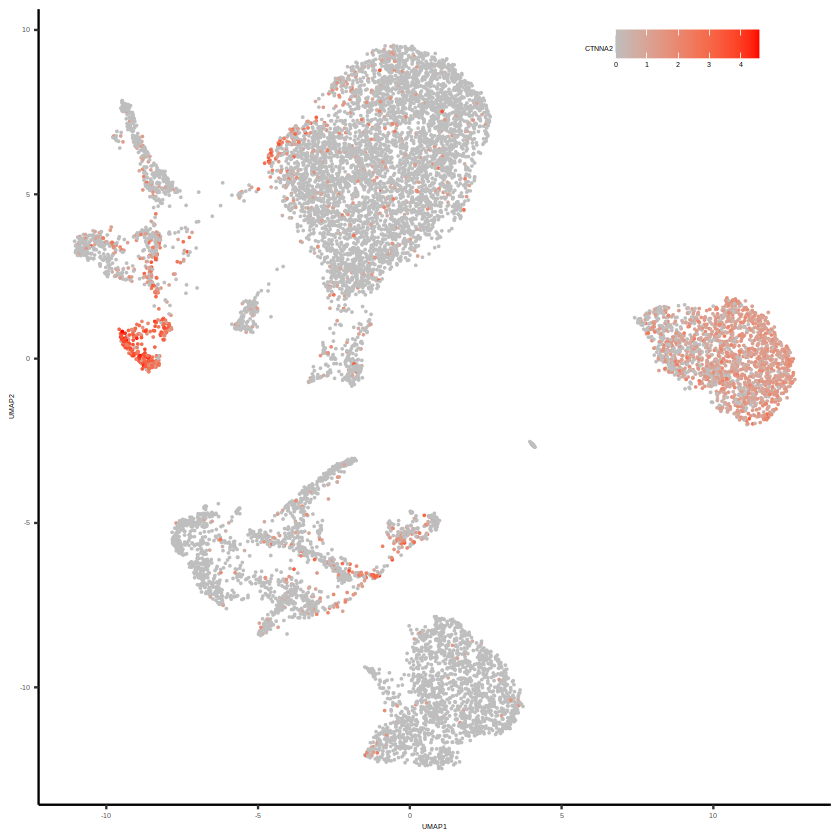

In [509]:
p.ctnna2 = make_umap_gene(umap_embeddings[sample(nrow(umap_embeddings), replace=FALSE), ], gene = "ctnna2", label = "CTNNA2",
                          raster = FALSE,
                          point_size = 0.00005,
                          font_size=4,
                          guide_size=2
                        )
p.ctnna2

if (SAVE) {
    ggsave(p.ctnna2, filename = glue("{SVG_DIR}/supp_figure_2B_ctnna2_umap.svg"), device = "svg", width = 4.2, height=4, dpi = 300)
    ggsave(p.ctnna2, filename = glue("{PNG_DIR}/supp_figure_2B_ctnna2_umap.png"), device = "png", width = 4.2, height=4, dpi = 300)
}

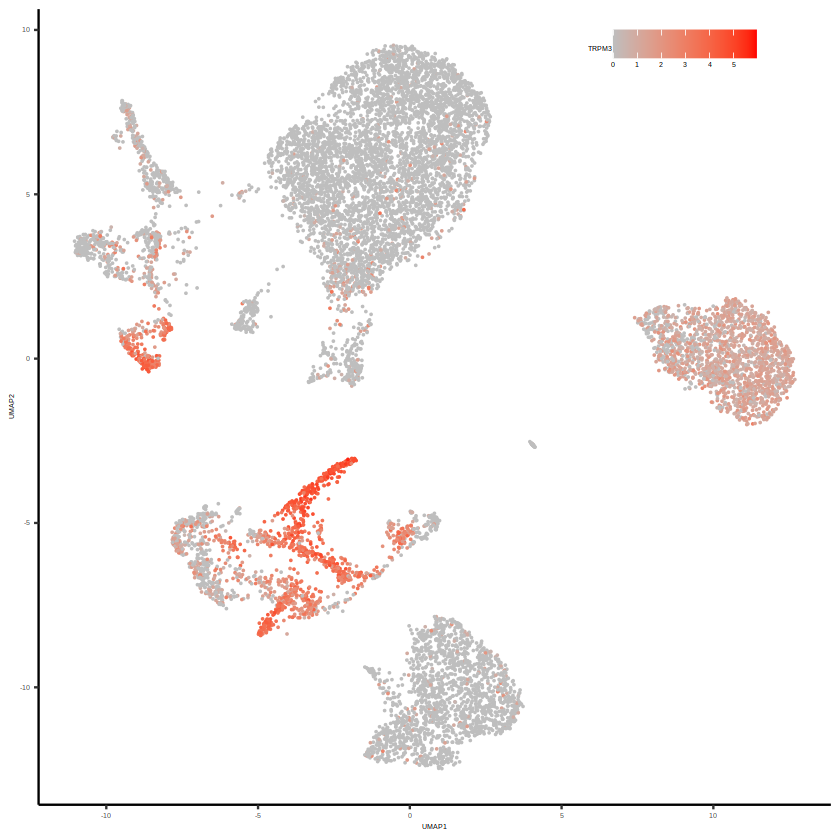

In [508]:
p.trpm3 = make_umap_gene(umap_embeddings[sample(nrow(umap_embeddings), replace=FALSE), ], gene = "trpm3", label = "TRPM3",
                         raster = FALSE,
                         point_size = 0.00005,
                         font_size=4,
                         guide_size=2
                        )
p.trpm3

if (SAVE) {
    ggsave(p.trpm3, filename = glue("{SVG_DIR}/supp_figure_2B_trpm3_umap.svg"), device = "svg", width = 4.2, height=4, dpi = 300)
    ggsave(p.trpm3, filename = glue("{PNG_DIR}/supp_figure_2B_trpm3_umap.png"), device = "png", width = 4.2, height=4, dpi = 300)
}

### Supplemental Figure 2C

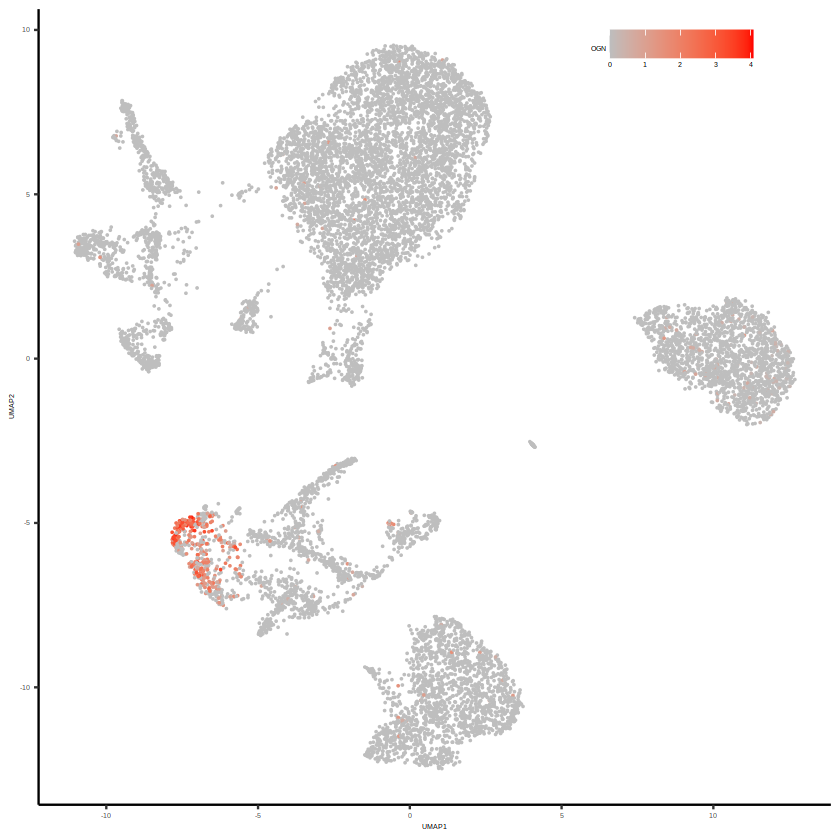

In [510]:
p.ogn = make_umap_gene(umap_embeddings[sample(nrow(umap_embeddings), replace=FALSE), ], gene = "ogn", label = "OGN",
                       raster = FALSE,
                       point_size = 0.00005,
                       font_size=4,
                       guide_size=2
                      )
p.ogn

if (SAVE) {
    ggsave(p.ogn, filename = glue("{SVG_DIR}/supp_figure_2C_ogn_umap.svg"), device = "svg", width = 4.2, height=4, dpi = 300)
    ggsave(p.ogn, filename = glue("{PNG_DIR}/supp_figure_2C_ogn_umap.png"), device = "png", width = 4.2, height=4, dpi = 300)
}

### Supplemental Figure 2D

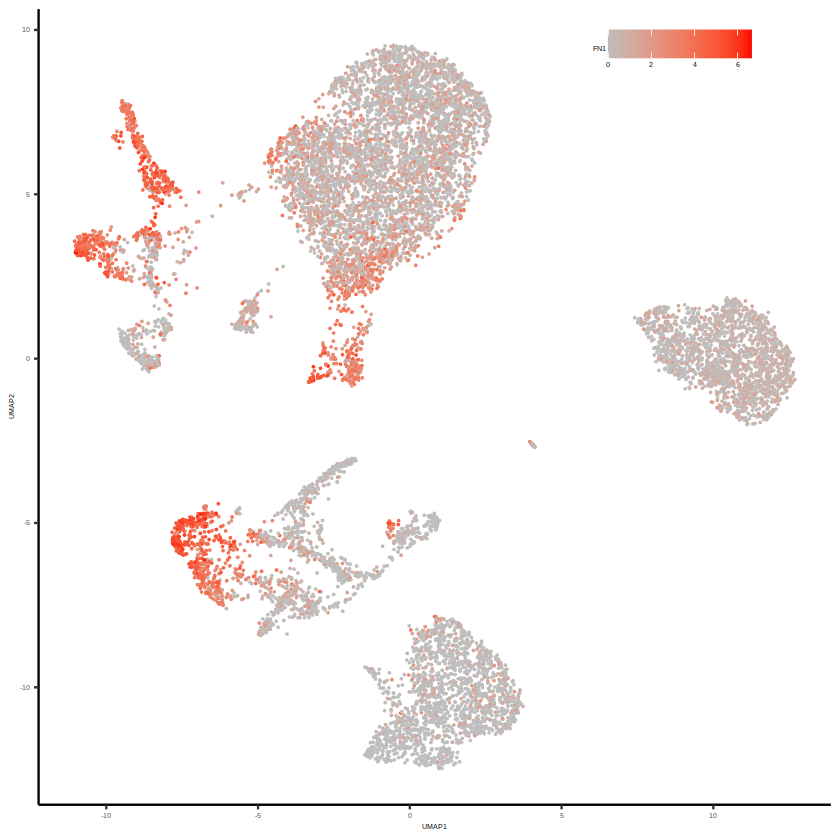

In [512]:
p.fn1 = make_umap_gene(umap_embeddings[sample(nrow(umap_embeddings), replace=FALSE), ], gene = "fn1", label = "FN1",
                       raster = FALSE,
                       point_size = 0.00005,
                       font_size=4,
                       guide_size=2
                      )
p.fn1

if (SAVE) {
    ggsave(p.fn1, filename = glue("{SVG_DIR}/supp_figure_2C_fn1_umap.svg"), device = "svg", width = 4.2, height=4, dpi = 300)
    ggsave(p.fn1, filename = glue("{PNG_DIR}/supp_figure_2C_fn1_umap.png"), device = "png", width = 4.2, height=4, dpi = 300)
}

### Supplemental Figure 3A D12 vs. D24 selected gene heatmap

In [229]:
fs_gene_df <- read.csv(file = "../feature_selection/feature_selected_genes.csv", stringsAsFactors = FALSE)

In [230]:
markers <- fs_gene_df$gene

In [231]:
markers

[1] "ACTA1"     "FBN2"      "MYH6"      "INPP4B"    "COL2A1"    "ADAMTS12" 
 [7] "CCDC141"   "HS3ST4"    "RNA28S5"   "FHOD3"     "GRIN2A"    "GOLIM4"   
[13] "PRTG"      "PLN"       "VCAN"      "MYO1D"     "CNTN5"     "BMPER"    
[19] "MASP1"     "FAM19A4"   "ATP1A1"    "WWOX"      "STK39"     "FRMD4B"   
[25] "SPHKAP"    "MYH7"      "FBXL7"     "PAM"       "PDGFD"     "RNF150"   
[31] "MEF2C"     "H19"       "GAPDH"     "RBFOX2"    "LINC00881" "MLIP"     
[37] "MOXD1"     "SV2C"      "PRSS35"    "DOK4"

In [232]:
top.marker.mat <- cardio@scale.data[unique(markers), (cardio@meta.data$dayP %in% c("D12", "D24") & cardio@meta.data$res.0.5%in% c("1", "0"))]
top.marker.mat = t(scale(t(top.marker.mat), center = TRUE, scale=TRUE))

top.marker.metdata <- cardio@meta.data[, c("dayP", "res.0.5")]
top.marker.metdata = top.marker.metdata[(top.marker.metdata$dayP %in% c("D12", "D24") & top.marker.metdata$res.0.5%in% c("1", "0")), ]

top.marker.metdata$Day <- top.marker.metdata$dayP

top.marker.metdata$cell <- rownames(top.marker.metdata)
top.marker.metdata$Cluster <- factor(top.marker.metdata$res.0.5, levels = c("0", "1"))

top.marker.metdata <- top.marker.metdata %>% arrange(Day)

cells <- top.marker.metdata$cell
top.marker.metdata <- top.marker.metdata[, c("Day"), drop=FALSE]

rownames(top.marker.metdata) <- cells

top_marker.mat.ordered <- top.marker.mat[, cells]

In [233]:
min(top_marker.mat.ordered)

[1] -5.086867

In [234]:
max(top_marker.mat.ordered)

[1] 7.52949

In [235]:
top_marker.mat.ordered[top_marker.mat.ordered > 5] <- 5

In [236]:
table(top.marker.metdata$Day)


 D12  D24 
2855 2090 

In [237]:
palette_length <- 1000
my_palette <- colorRampPalette(c("blue", "white", "red"))(n = palette_length)

my_breaks <- c(seq(min(top_marker.mat.ordered), 0, length.out=ceiling(palette_length/2) + 1), 
              seq(max(top_marker.mat.ordered)/palette_length, max(top_marker.mat.ordered), length.out=floor(palette_length/2)))


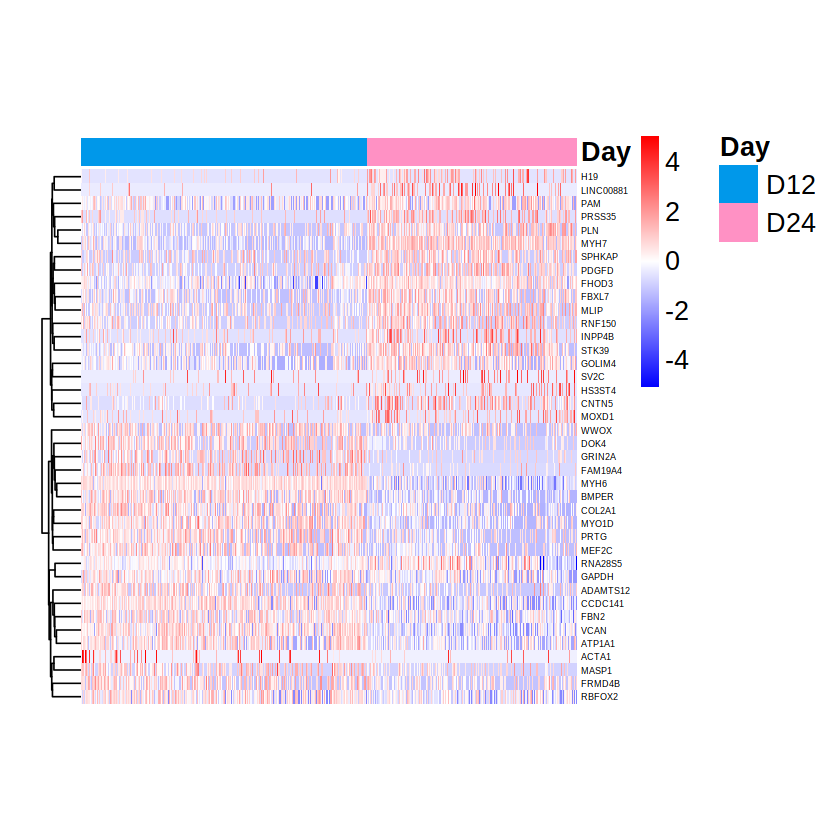

In [247]:
ann_colors <- list(
    Day = c("D12" = "#0098EA", "D24" = "#FF91C4")
)
pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata,
         labels_col = top.marker.metdata$Day,
         cellheight = 8,
         cellwidth = 0.06,
         fontsize_row = 5,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = TRUE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 16,
         treeheight_row = 20
        )

if (SAVE) {
    pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata,
         labels_col = top.marker.metdata$Day,
         cellheight = 8,
         cellwidth = 0.06,
         fontsize_row = 8,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = TRUE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 13,
         treeheight_row = 20,
         width = 7,
         height = 5,
         filename = glue("{PDF_DIR}/supp_figure_3A_protocol1_D12vD24_feaure_selection_genees.pdf"),
        )
    
    pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata,
         labels_col = top.marker.metdata$Day,
         cellheight = 8,
         cellwidth = 0.06,
         fontsize_row = 8,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = TRUE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 13,
         treeheight_row = 20,
         width = 7,
         height = 5,
         filename = glue("{PNG_DIR}/supp_figure_3A_protocol1_D12vD24_feaure_selection_genees.png"),
        )
}    

### Supplemental Figure 3B D24 vs. D90 selected gene heatmap

In [248]:
fs_gene_df <- read.csv(file = "../feature_selection/feature_selected_genes_d24_d90.csv", stringsAsFactors = FALSE)

In [249]:
markers <- fs_gene_df$gene

In [250]:
markers

[1] "NLGN1"   "ALPK2"   "MYH6"    "SC5D"    "COL2A1"  "PDE3A"   "CALD1"  
 [8] "PRKG1"   "PRTG"    "RHOBTB3" "BMPER"   "SNHG14"  "KCNQ5"   "TRIM24" 
[15] "WNT5B"   "LDLRAD4" "TENM4"   "IGF2"    "RALYL"   "NFIB"    "HDAC9"  
[22] "EFNA5"   "H19"     "DENND5B" "A2M"     "STK38L"  "CRYAB"   "MFAP4"  
[29] "C7"      "HECW2"   "ACTG1"   "EGR1"    "PLCL1"   "SOX6"    "SULT1E1"
[36] "PDE1C"   "PRRX1"   "CPNE5"   "RGS6"    "NCKAP5"  "FGF12"

In [251]:
top.marker.mat <- cardio@data[unique(markers), (cardio@meta.data$dayP %in% c("D24", "D90") & cardio@meta.data$res.0.5%in% c("1", "3"))]
top.marker.mat = t(scale(t(top.marker.mat), center = TRUE, scale=TRUE))

top.marker.metdata <- cardio@meta.data[, c("dayP", "res.0.5")]
top.marker.metdata = top.marker.metdata[(top.marker.metdata$dayP %in% c("D24", "D90") & top.marker.metdata$res.0.5%in% c("1", "3")), ]

top.marker.metdata$Day <- top.marker.metdata$dayP

top.marker.metdata$cell <- rownames(top.marker.metdata)
top.marker.metdata$Cluster <- factor(top.marker.metdata$res.0.5, levels = c("1", "3"))

top.marker.metdata <- top.marker.metdata %>% arrange(Day)

cells <- top.marker.metdata$cell
top.marker.metdata <- top.marker.metdata[, c("Day"), drop=FALSE]

rownames(top.marker.metdata) <- cells

top_marker.mat.ordered <- top.marker.mat[, cells]

In [252]:
min(top_marker.mat.ordered)

[1] -2.571875

In [253]:
max(top_marker.mat.ordered)

[1] 4.364206

In [254]:
top_marker.mat.ordered[top_marker.mat.ordered > 4] <- 4

In [255]:
table(top.marker.metdata$Day)


 D24  D90 
1949 1711 

In [256]:
palette_length <- 1000
my_palette <- colorRampPalette(c("blue", "white", "red"))(n = palette_length)

my_breaks <- c(seq(min(top_marker.mat.ordered), 0, length.out=ceiling(palette_length/2) + 1), 
              seq(max(top_marker.mat.ordered)/palette_length, max(top_marker.mat.ordered), length.out=floor(palette_length/2)))


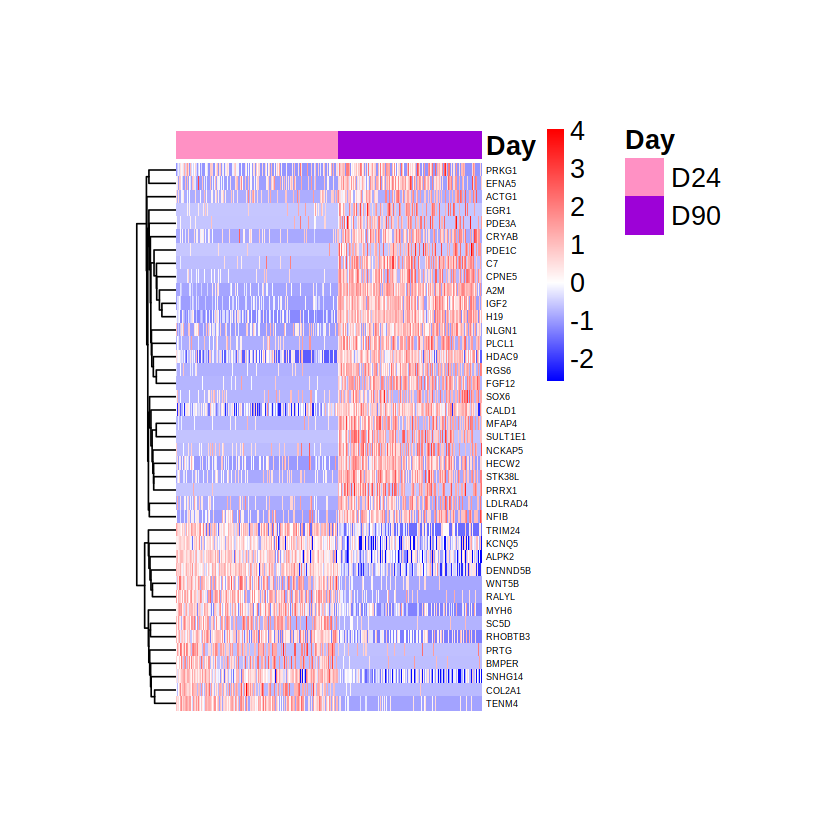

In [259]:
ann_colors <- list(
    Day = c("D24" = "#FF91C4", "D90" = "#9D02D7")
)
pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata,
         labels_col = top.marker.metdata$Day,
         cellheight = 8,
         cellwidth = 0.05,
         fontsize_row = 5,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = TRUE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 16,
         treeheight_row = 20,
        
        )

if (SAVE) {
    pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata,
         labels_col = top.marker.metdata$Day,
         cellheight = 8,
         cellwidth = 0.06,
         fontsize_row = 8,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = TRUE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 13,
         treeheight_row = 20,
         width = 6,
         height = 5,
         filename = glue("{PDF_DIR}/supp_figure_3B_protocol1_D24vD90_feaure_selection_genees.pdf"),
        )
    
    pheatmap(top_marker.mat.ordered, scale = "none",
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         annotation_col = top.marker.metdata,
         labels_col = top.marker.metdata$Day,
         cellheight = 8,
         cellwidth = 0.06,
         fontsize_row = 8,
         color = my_palette,
         breaks = my_breaks,
         annotation_names_col = TRUE,
         show_colnames = FALSE,
         annotation_colors = ann_colors,
         border_color = NA,
         fontsize = 13,
         treeheight_row = 20,
         width = 6,
         height = 5,
         filename = glue("{PNG_DIR}/supp_figure_3B_protocol1_D24vD90_feaure_selection_genees.png"),
        )
}    

### Supplemental Figure 3C GO enrichment

In [559]:
d0v12_df = read.csv("/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/paper_plots/small_molecule_cardio_timepoints_indepth/de_analysis_calcnorm/cluster0v2_go_bp_simplify.csv", stringsAsFactors=FALSE)
d12v24_df = read.csv("/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/paper_plots/small_molecule_cardio_timepoints_indepth/de_analysis_calcnorm/cluster0v1_go_bp_simplify.csv", stringsAsFactors=FALSE)
d24v90_df = read.csv("/allen/aics/gene-editing/Manuscripts/Transcriptomics_2019/scrnaseq_supplement/paper_plots/small_molecule_cardio_timepoints_indepth/de_analysis_calcnorm/cluster1v3_go_bp_simplify.csv", stringsAsFactors=FALSE)

In [560]:
d0v12_df$group = "D0v12"
d12v24_df$group = "D12v24"
d24v90_df$group = "D24v90"

In [567]:
go_combined_df = rbind(head(d0v12_df, n=10), head(d12v24_df, n=10), head(d24v90_df, n=10))

In [568]:
head(go_combined_df)

X          ID         Description                          GeneRatio
1 GO:0022613 GO:0022613 ribonucleoprotein complex biogenesis 259/3440 
2 GO:0006401 GO:0006401 RNA catabolic process                222/3440 
3 GO:0019080 GO:0019080 viral gene expression                131/3440 
4 GO:0019083 GO:0019083 viral transcription                  122/3440 
5 GO:0016072 GO:0016072 rRNA metabolic process               149/3440 
6 GO:0006413 GO:0006413 translational initiation             124/3440 
  BgRatio   pvalue       p.adjust     qvalue      
1 441/13669 3.144991e-52 1.834788e-48 1.485429e-48
2 364/13669 1.216246e-48 3.547789e-45 2.872261e-45
3 184/13669 1.186345e-39 1.384227e-36 1.120659e-36
4 170/13669 1.430036e-37 1.390471e-34 1.125714e-34
5 232/13669 1.255397e-36 1.046284e-33 8.470625e-34
6 184/13669 9.092997e-34 5.304854e-31 4.294766e-31
  geneID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
1 C1QBP/TICRR/DDX21/MYBBP1A/MDN1/RPS6/UTP20/RRP1B/PSIP1/RAN/NOP56/SNRPB/NOLC1/PAK1IP1/WDR43/SNRPD1/HSP90AB1/HEATR1/DKC1/LYAR/ADAR/CEBPZ/PDCD11/G3BP1/URB2/RSL1D1/SRPK1/PES1/URB1/XRN2/MPHOSPH6/RPL3/TSR1/FBL/SF3A3/SF3A1/NOP58/DHX9/RPS5/RPS21/HSP90AA1/EBNA1BP2/DDX18/ABCE1/DCAF13/AGO1/GNL2/PWP2/GNL3L/WDR3/RPS14/RPL35/LTV1/RUVBL1/RPL12/RPS19/EXOSC2/NOL11/DDX23/TGS1/PA2G4/CNOT1/RPL6/RPF2/BRIX1/PRPF19/NOP2/CELF2/NHP2/TEX10/SNRNP200/UTP18/SNRPD2/RPS16/LSM4/EIF3B/UTP14A/DHX37/SNRPF/BMS1/MRTO4/RPSA/WDR75/SRFBP1/RPS2/SDAD1/KRI1/RPL38/PTGES3/GEMIN5/NOM1/PWP1/RPL11/PRPF8/RPL14/NPM1/EIF2S2/DDX27/WDR36/RPL13A/NOL6/RPS9/LSM3/WDR46/UTP15/SRSF1/AGO2/RRP1/RPS15/RUVBL2/EIF4A3/GTF3A/NOP14/RPL27/FTSJ3/EMG1/RPS7/MRPS2/GTPBP4/EXOSC9/SF3B1/ERAL1/RRP15/TRAF7/NOP16/RPL10A/EIF3D/ATXN2L/RCL1/SRSF9/PELP1/DDX10/IMP3/NIP7/UTP6/EIF3G/WDR12/PRPF3/PRMT5/NOP10/NAT10/CHD7/RRP7A/DDX1/RPL7A/DDX54/SART3/RPL35A/DROSHA/RPP30/NOB1/EIF3A/RPS8/SURF6/THUMPD1/RPS23/BYSL/EIF3I/MRPL11/XPO1/RSL24D1/POLR2D/OGFOD1/FAM207A/ESF1/NLE1/GEMIN4/RPLP0/EIF2S3/EIF3M/DDX20/NOC2L/EIF3H/SNRPE/WDR74/EXOSC10/RIOK1/PIH1D1/EXOSC8/LAS1L/PRKAA2/UTP3/SF3A2/RPL23A/RRP9/RPS24/SNRPC/NOL8/WBP11/NCBP1/EIF2S1/NOL9/RPL5/FASTKD2/SNRPD3/GLUL/PRPF31/EIF4B/EIF2A/DENR/RBMX/CNOT7/NUDT21/DDX52/ISG20L2/NUFIP1/SF1/DDX31/TAF9/MRPL20/DIMT1/RPL10/EIF3E/MRPS9/IMP4/DIS3/NUP88/RRP36/RIOK3/WDR18/FCF1/EIF3L/TBL3/DICER1/TRMT112/HEATR3/GAR1/CUL4A/LSM6/NOL10/RPF1/RPL26/USP39/SFSWAP/DYNC1H1/SETX/PRPF6/NAF1/RPL24/DDX56/EXOSC1/SNRPG/EIF5/SRSF6/SIRT1/USP36/G3BP2/WDR77/DDX3X/TFB1M/DDX6/ERI1/RIOK2/TXNL4A/EXOSC7/AATF/SART1/RPS28/AGO4
2 LIN28A/RBM24/HSPA8/SAMD4A/TRIM71/R

In [576]:
go_combined_df$group = factor(go_combined_df$group, levels = c("D0v12", "D12v24", "D24v90"))

In [581]:
unique(go_combined_df$Description)

[1] "ribonucleoprotein complex biogenesis"                          
 [2] "RNA catabolic process"                                         
 [3] "viral gene expression"                                         
 [4] "viral transcription"                                           
 [5] "rRNA metabolic process"                                        
 [6] "translational initiation"                                      
 [7] "cotranslational protein targeting to membrane"                 
 [8] "establishment of protein localization to endoplasmic reticulum"
 [9] "DNA conformation change"                                       
[10] "RNA localization"                                              
[11] "regulation of the force of heart contraction"                  
[12] "muscle hypertrophy in response to stress"                      
[13] "cardiac muscle adaptation"                                     
[14] "cardiac muscle hypertrophy in response to stress"              
[15] "regulation of ion transmembrane transporter activity"          
[16] "regulation of transporter activity"                            
[17] "extracellular matrix organization"                             
[18] "heart morphogenesis"                                           
[19] "regulation of membrane potential"                              
[20] "cardiac muscle hypertrophy"                                    
[21] "regulation of system process"                                  
[22] "muscle system process"                                         
[23] "cardiac conduction"                                            
[24] "multicellular organismal signaling"                            
[25] "heart development"                                             
[26] "embryonic morphogenesis"                                       
[27] "actin-mediated cell contraction"                               
[28] "wound healing"                                                 
[29] "cell-substrate adhesion"

In [663]:
write.csv(go_combined_df, file="enriched_go_categories.csv", row.names=FALSE)

In [583]:
go_plot = ggplot(go_combined_df, aes(x = group, y = Description, size = Count)) +
geom_point(color="red") +
theme_bw()

In [594]:
options(repr.plot.width = 6.2, repr.plot.height = 6, repr.plot.res = 120)

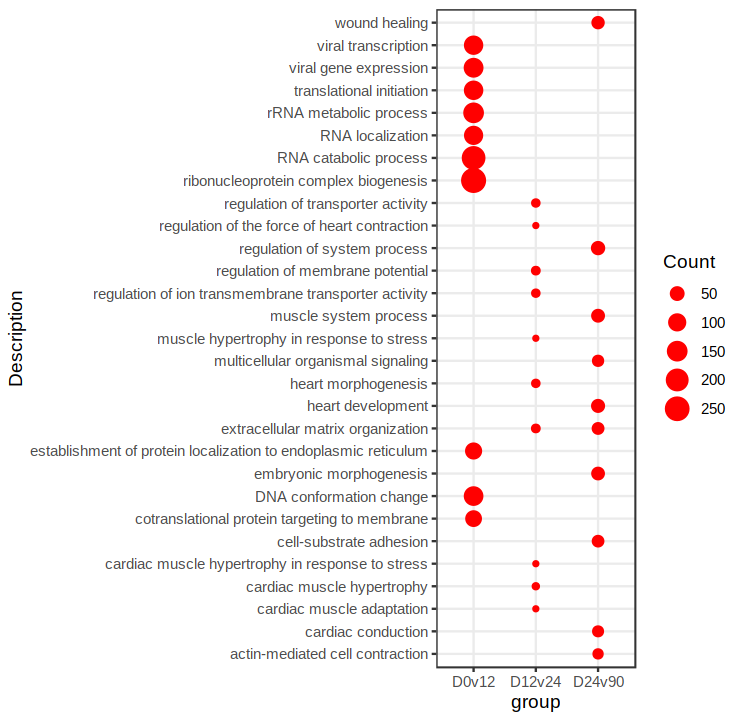

In [596]:
go_plot
if (SAVE) {
    ggsave(go_plot, filename = glue("{SVG_DIR}/supp_figure_3C_go_terms.svg"), device = "svg", width = 6.2, height=6, dpi = 300)
    ggsave(go_plot, filename = glue("{PNG_DIR}/supp_figure_3C_go_terms.png"), device = "png", width = 6.2, height=6, dpi = 300)
}

### Supplemental Figure 3D

#### SMADs, TFs

In [513]:
clusters = c("2", "0", "1", "3")
genes = c("LDLRAD4", "SMAD9", "MEF2C", "TGFB2", "TGFBR2")

p.smad_tf = cluster_group_violin(cardio, group_order=clusters, genes.plot = genes, cluster_color_df = cluster_color_df, font_size = 4)

if (SAVE) {
    ggsave(p.smad_tf, filename = glue("{SVG_DIR}/supp_figure_3D_smad_tf_violin.svg"), device = "svg", width = 4, height=4, dpi = 300)
    ggsave(p.smad_tf, filename = glue("{PNG_DIR}/supp_figure_3D_smad_tf_violin.png"), device = "png", width = 4, height=4, dpi = 300)
}

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. 

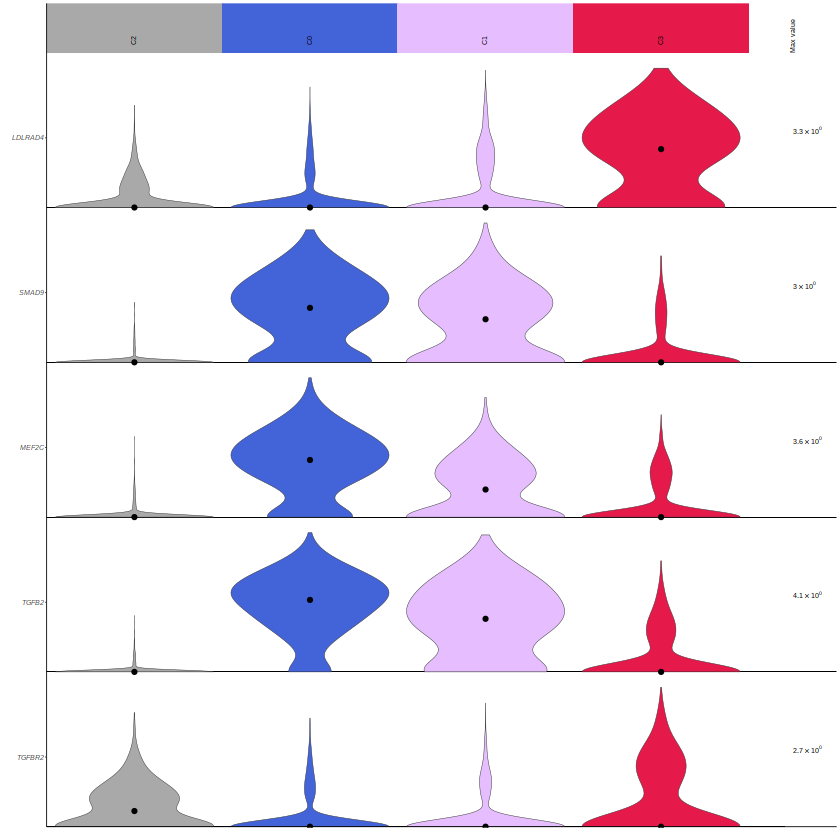

In [514]:
p.smad_tf

#### Signaling

In [515]:
clusters = c("2", "0", "1", "3")
genes = c("PDE7A", "PDE4D", "ADCY5", "PDE3A", "PDE10A", "PDE1C")

p.signaling = cluster_group_violin(cardio, group_order=clusters, genes.plot = genes, cluster_color_df = cluster_color_df, font_size = 4)

if (SAVE) {
    ggsave(p.signaling, filename = glue("{SVG_DIR}/supp_figure_3D_signaling_violin.svg"), device = "svg", width = 4, height=4, dpi = 300)
    ggsave(p.signaling, filename = glue("{PNG_DIR}/supp_figure_3D_signaling_violin.png"), device = "png", width = 4, height=4, dpi = 300)
}

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. 

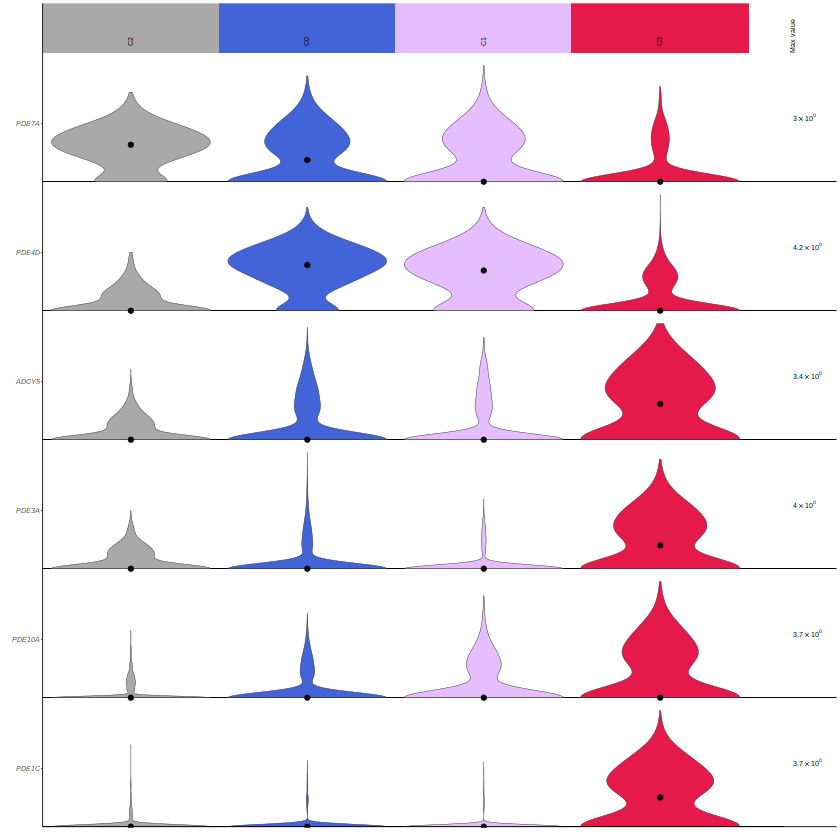

In [516]:
p.signaling

#### Channels

In [517]:
clusters = c("2", "0", "1", "3")
genes = c("CACNA1C", "CACNA1D", "CASQ2", "KCNIP4", "KCNT2", "SCN5A", "KCNQ1")

p.channels = cluster_group_violin(cardio, group_order=clusters, genes.plot = genes, cluster_color_df = cluster_color_df, font_size = 4)

if (SAVE) {
    ggsave(p.channels, filename = glue("{SVG_DIR}/supp_figure_3D_channels_violin.svg"), device = "svg", width = 4, height=4, dpi = 300)
    ggsave(p.channels, filename = glue("{PNG_DIR}/supp_figure_3D_channels_violin.png"), device = "png", width = 4, height=4, dpi = 300)
}

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. 

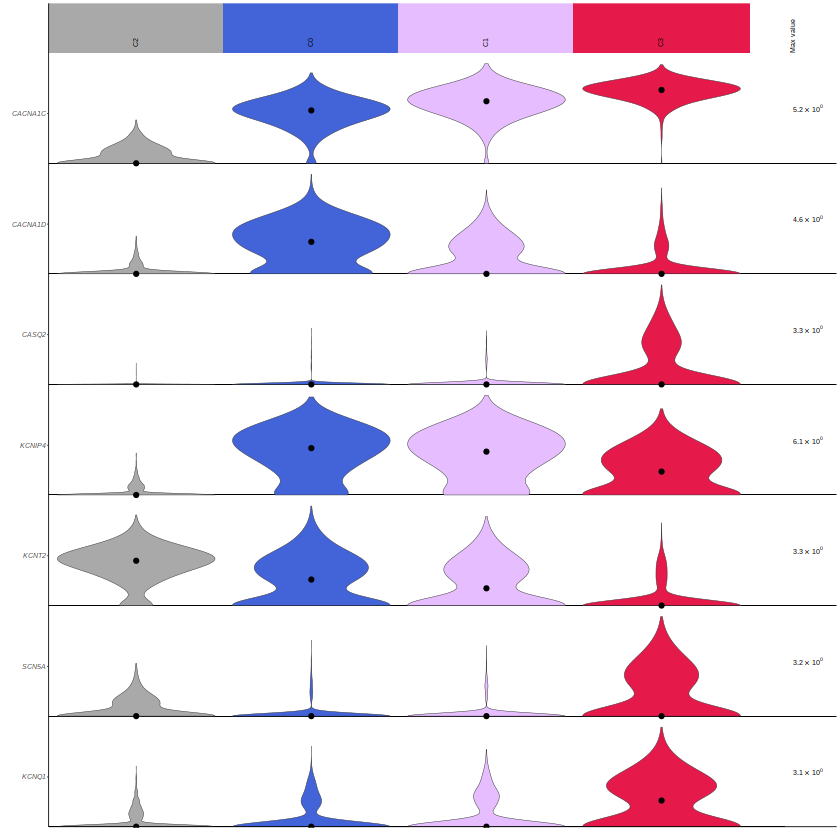

In [518]:
p.channels

#### Metabolic

In [519]:
clusters = c("2", "0", "1", "3")
genes = c("SLC2A3", "SLC27A6", "FABP3", "IGFBP5")

p.metabolic = cluster_group_violin(cardio, group_order=clusters, genes.plot = genes, cluster_color_df = cluster_color_df, font_size = 4)

if (SAVE) {
    ggsave(p.metabolic, filename = glue("{SVG_DIR}/supp_figure_3D_metabolic_violin.svg"), device = "svg", width = 4, height=3, dpi = 300)
    ggsave(p.metabolic, filename = glue("{PNG_DIR}/supp_figure_3D_metabolic_violin.png"), device = "png", width = 4, height=3, dpi = 300)
}

Warning message:
“Column `cluster_id` joining character vector and factor, coercing into character vector”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”
Warning message:
“`fun.y` is deprecated. Use `fun` instead.”
Warning message:
“`fun.ymin` is deprecated. Use `fun.min` instead.”
Warning message:
“`fun.ymax` is deprecated. Use `fun.max` instead.”


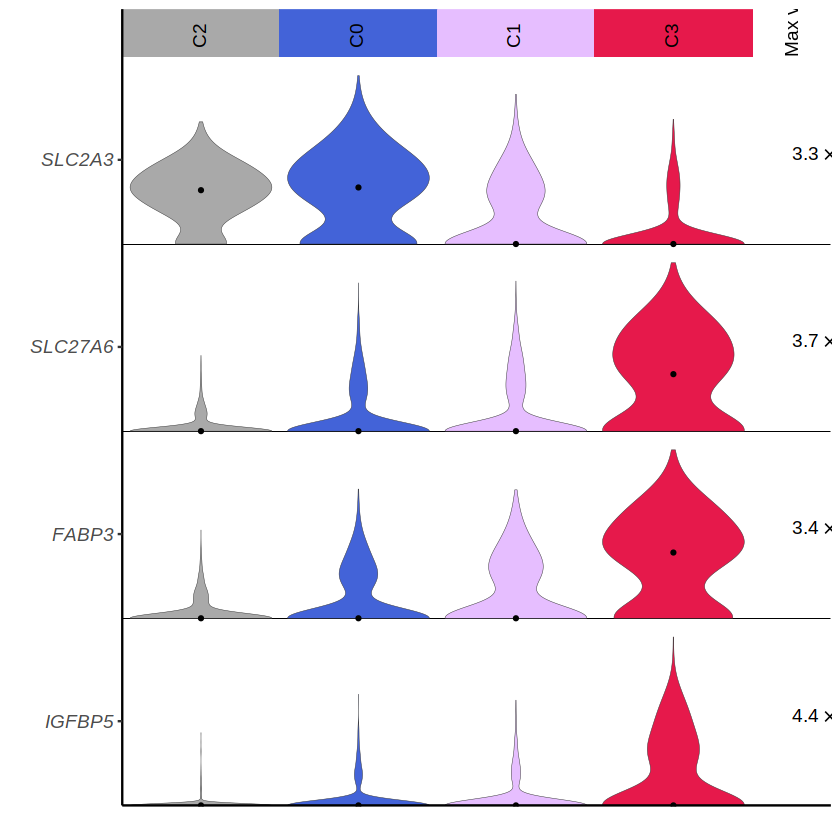

In [327]:
p.metabolic

### Supplemental Figure 4G

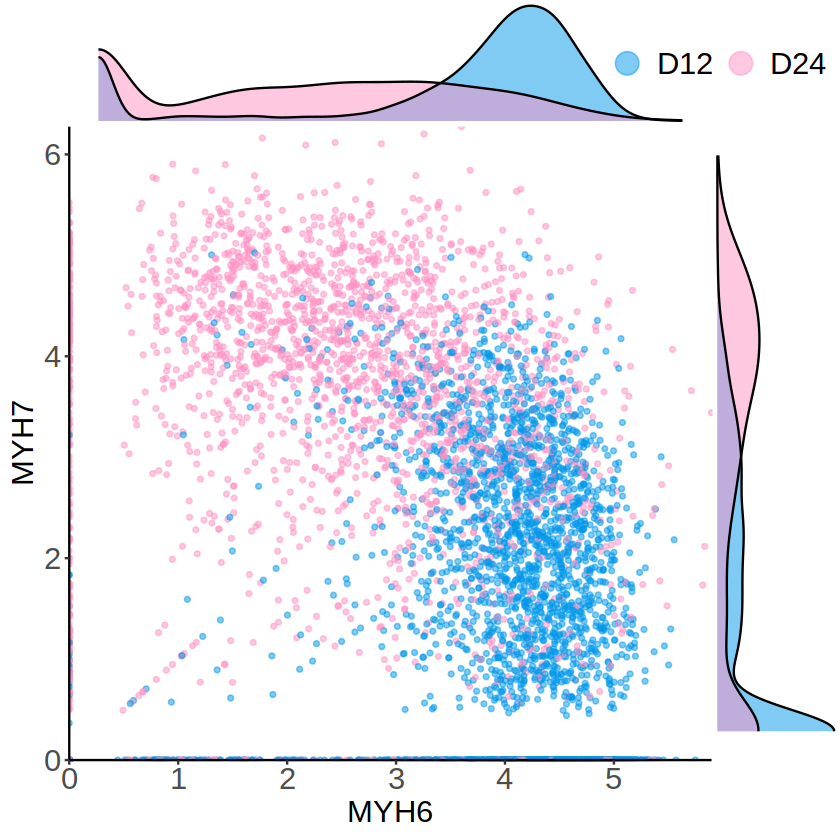

In [523]:
d12_d24_df = umap_embeddings[umap_embeddings$day %in% c("D12", "D24"), ]
p.myh6_myh7_corr = ggplot(d12_d24_df[sample(nrow(d12_d24_df), replace=FALSE), ], aes(x = myh6, y = myh7, color = dayP)) + geom_point(alpha = 0.5, size=1) +

    scale_color_manual(name = "",
                         breaks = c("D0", "D12", "D24", "D90"), 
                         values = c("D0" = "#FFD700",
                                  "D12" = "#0098EA",
                                  "D24" = "#FF91C4",
                                  "D90" = "#9D02D7"
                                  )
                        ) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=6))) +
    theme(legend.text = element_text(size = 18)) + 
    theme(text = element_text(size = 18), axis.text = element_text(size = 18)) +
    theme(legend.position = c(1, 1.1)) +
    theme(legend.direction="horizontal") +
    scale_x_continuous(expand=c(0, 0)) +
    scale_y_continuous(expand=c(0, 0)) +
    xlab("MYH6") +
    ylab("MYH7")

p.myh6_myh7_corr = ggMarginal(p.myh6_myh7_corr, groupFill = TRUE, alpha = 0.5)
p.myh6_myh7_corr

if (SAVE) {
    ggsave(p.myh6_myh7_corr, filename = glue("{SVG_DIR}/supp_figure_4G_myh67_scatter.svg"), device = "svg", width = 5, height=5, dpi = 300)
    ggsave(p.myh6_myh7_corr, filename = glue("{PNG_DIR}/supp_figure_4G_myh67_scatter.png"), device = "png", width = 5, height=5, dpi = 300)
}

### Supplemental Figure 4H

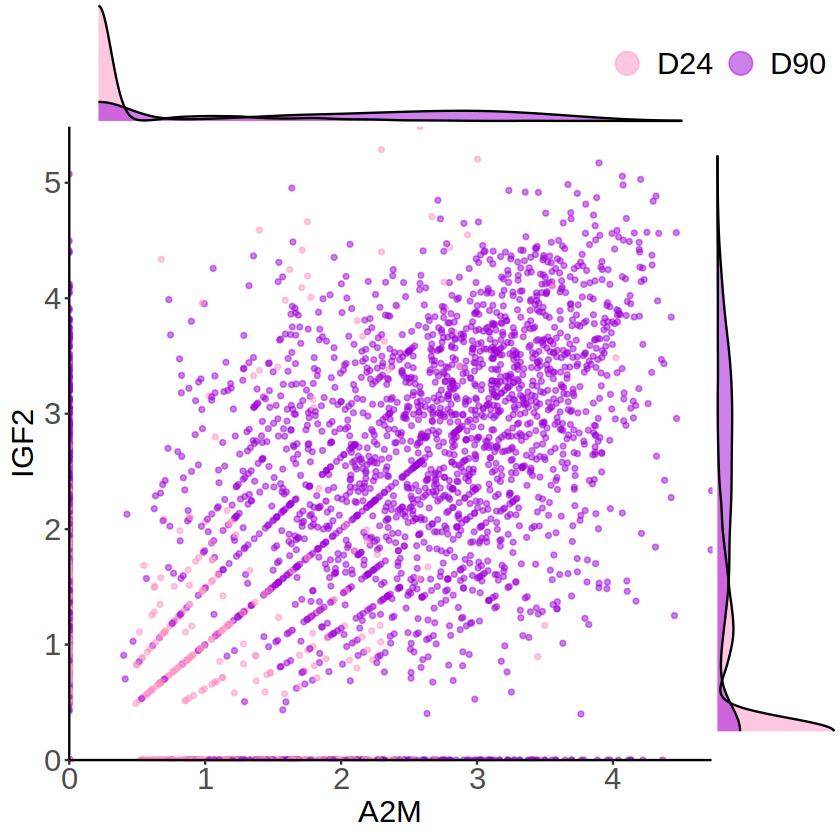

In [524]:
d24_d90_df = umap_embeddings[umap_embeddings$dayP %in% c("D24", "D90"), ]
p.a2m_igf2_corr = ggplot(d24_d90_df[sample(nrow(d24_d90_df), replace=FALSE), ], aes(x = a2m, y = igf2, color = dayP)) + geom_point(alpha = 0.5, size=1) +

    scale_color_manual(name = "",
                         breaks = c("D0", "D12", "D24", "D90"), 
                         values = c("D0" = "#FFD700",
                                  "D12" = "#0098EA",
                                  "D24" = "#FF91C4",
                                  "D90" = "#9D02D7"
                                  )
                        ) +
    theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), axis.line = element_line(colour = "black")) +
    guides(color = guide_legend(nrow = 1, override.aes = list(size=6))) +
    theme(legend.text = element_text(size = 18)) + 
    theme(text = element_text(size = 18), axis.text = element_text(size = 18)) +
    theme(legend.position = c(1, 1.1)) +
    theme(legend.direction="horizontal") +
    scale_x_continuous(expand=c(0, 0)) +
    scale_y_continuous(expand=c(0, 0)) +
    xlab("A2M") +
    ylab("IGF2")

p.a2m_igf2_corr = ggMarginal(p.a2m_igf2_corr, groupFill = TRUE, alpha = 0.5)
p.a2m_igf2_corr

if (SAVE) {
    ggsave(p.a2m_igf2_corr, filename = glue("{SVG_DIR}/supp_figure_4H_a2m_igf2_scatter.svg"), device = "svg", width = 5, height=5, dpi = 300)
    ggsave(p.a2m_igf2_corr, filename = glue("{PNG_DIR}/supp_figure_4H_a2m_igf2_scatter.png"), device = "png", width = 5, height=5, dpi = 300)
}